# Funding Allocation for Development Aid

#### Background

According to the International Monetary Fund (IMF), development aid is aid given by governments and other agencies to support the economic, environmental, social, and political development of developing countries.<br>

##### Problem Statement 

HELP International have been able to raise around 10 million dollars. Now the CEO of the NGO needs to decide how to use this money strategically and effectively.
<br>
So, the CEO has to make decision to choose the countries that are in the direst need of aid.
<br>
Hence, the goal is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

In [7]:
url='https://www.kaggle.com/lauraviera/using-ml-to-allocate-funding-for-development-aid/data?select=Country-data.csv'

In [2]:
import os
import opendatasets as od
import json

In [10]:
with open('C:/Users/swaro/Downloads/kaggle.json','r') as f1:
    data=json.load(f1)
    print(data1)

NameError: name 'data1' is not defined

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [16]:
import matplotlib as mp
%matplotlib inline

In [17]:
sns.set_style('darkgrid')
mp.rcParams['font.size']=(12)
mp.rcParams['figure.figsize']=(12,6)

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn import linear_model

In [26]:
!pip install geopandas

^C


In [27]:
!pip install yellowbrick

^C


In [28]:
import yellowbrick

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
#from yellowbrick.cluster import SilhouetteVisualizer
import geopandas as gpd
from geopandas import GeoDataFrame as gdf

In [21]:
data=pd.read_csv('C:/Users/swaro/Downloads/country_data.csv')

In [22]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [30]:
data.shape

(167, 10)

In [33]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [35]:
?data.describe

In [36]:
## to find the percentile and stats attribute of datasets 
data.describe(percentiles = [.25, .5, .75,.95, .99])

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [86]:
len(data[data.duplicated()])

0

In [87]:
data.country.nunique()

167

### data distribution

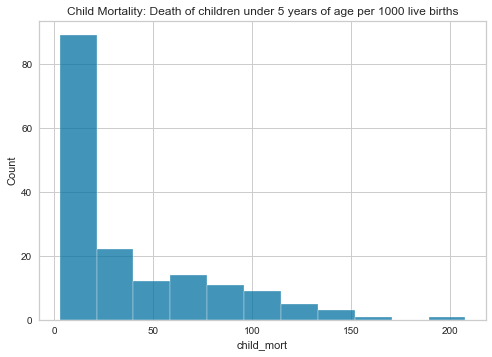

In [45]:
plt.title("Child Mortality: Death of children under 5 years of age per 1000 live births")
ax=sns.histplot(data=data, x='child_mort')

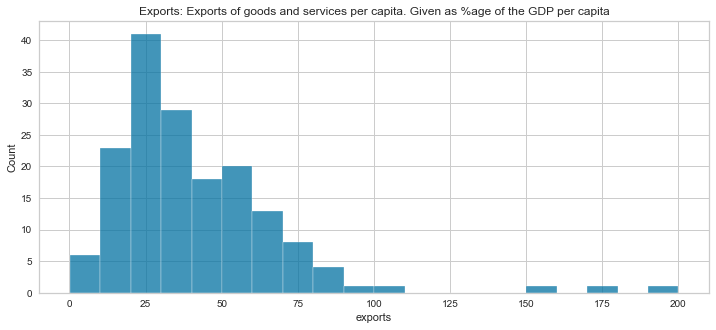

In [51]:
plt.figure(figsize=(12,5))
plt.title("Exports: Exports of goods and services per capita. Given as %age of the GDP per capita")
ax = sns.histplot(data=data,x="exports")

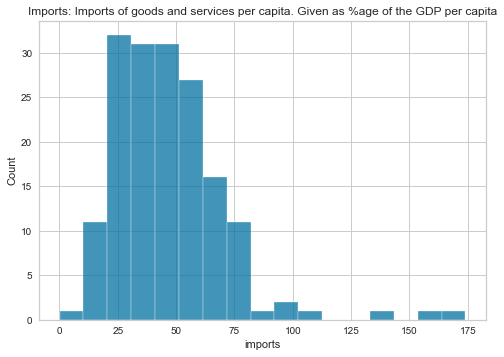

In [54]:
plt.title("Imports: Imports of goods and services per capita. Given as %age of the GDP per capita")
ax = sns.histplot(data=data,x="imports")

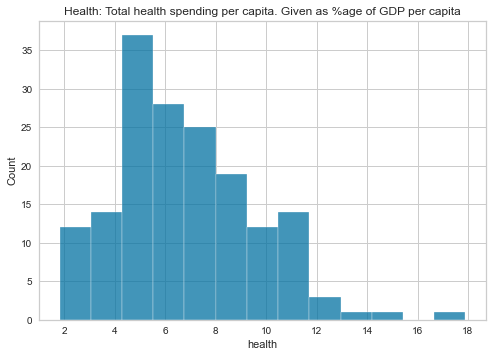

In [56]:
plt.title("Health: Total health spending per capita. Given as %age of GDP per capita")
ax = sns.histplot(data["health"])

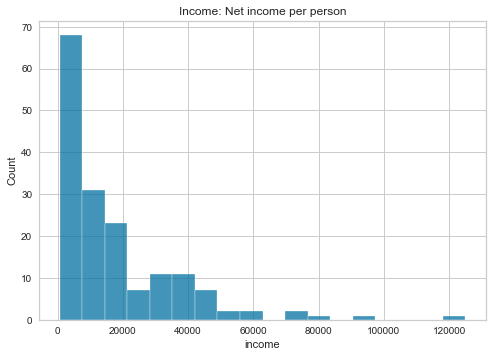

In [57]:
plt.title("Income: Net income per person")
ax = sns.histplot(data["income"])

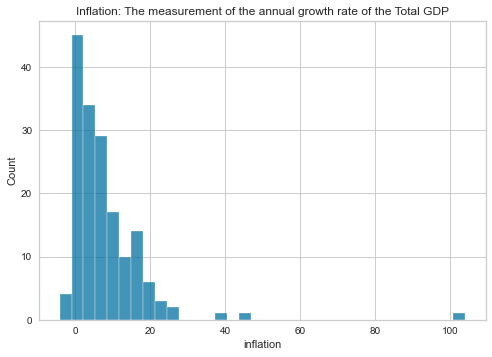

In [58]:
plt.title("Inflation: The measurement of the annual growth rate of the Total GDP")
ax = sns.histplot(data["inflation"])

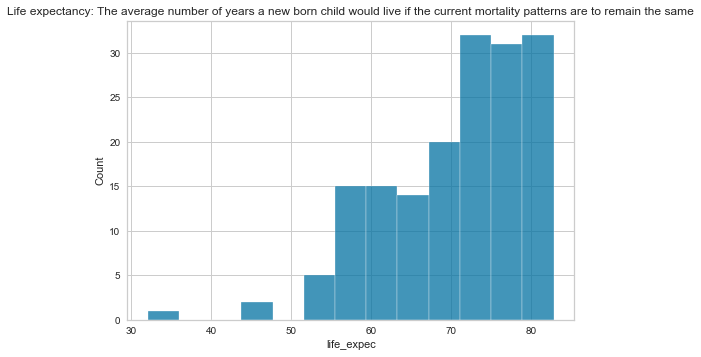

In [59]:
plt.title("Life expectancy: The average number of years a new born child would live if the current mortality patterns are to remain the same")
ax = sns.histplot(data["life_expec"])

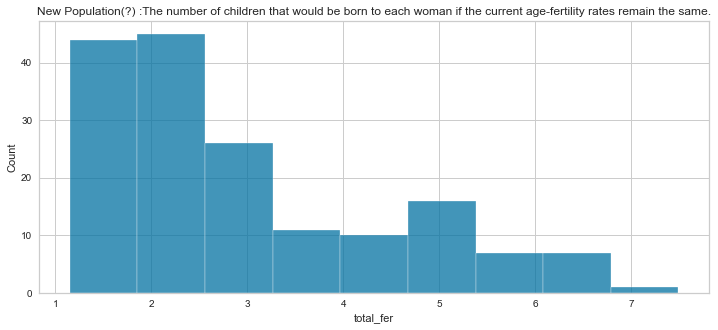

In [60]:
plt.figure(figsize=(12,5))
plt.title("New Population(?) :The number of children that would be born to each woman if the current age-fertility rates remain the same.")
ax = sns.histplot(data["total_fer"])

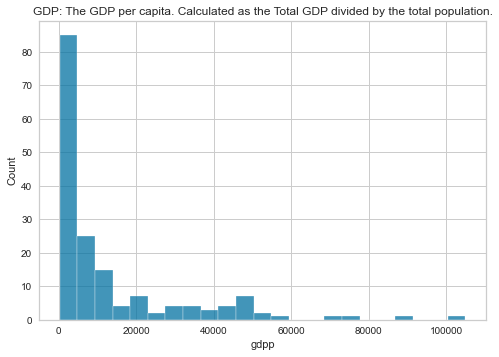

In [61]:
plt.title("GDP: The GDP per capita. Calculated as the Total GDP divided by the total population.")
ax = sns.histplot(data["gdpp"])

In [81]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

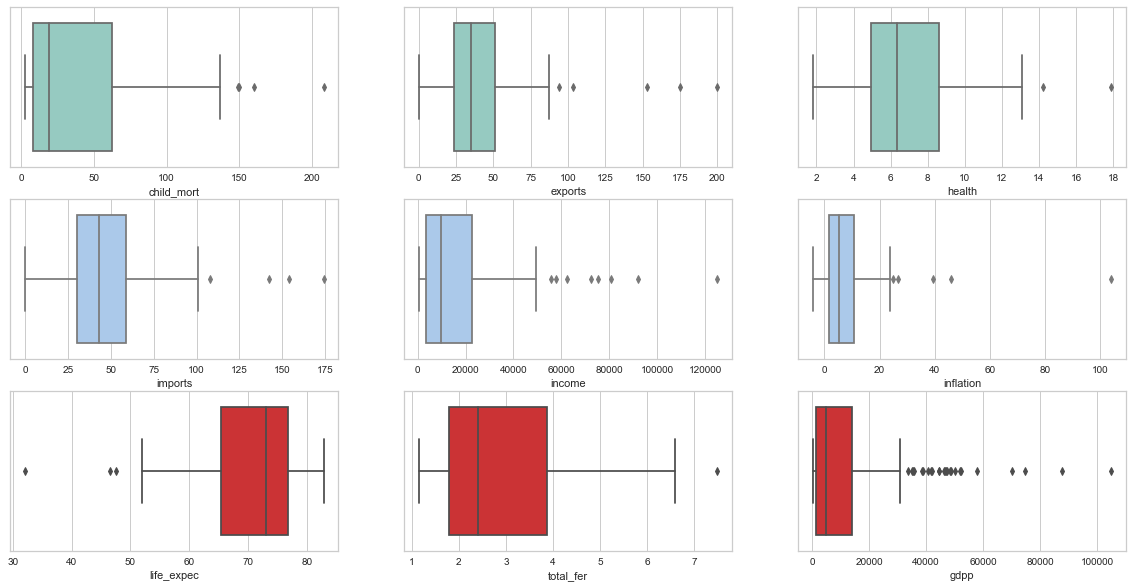

In [95]:
fig,ax=plt.subplots(3,3)
#plt.figure(figsize=(30,20))
mp.rcParams['figure.figsize']=(20,10)
mp.rc('font',size=20)
fig=sns.boxplot(data=data, x='child_mort', ax=ax[0,0], palette='Set3')

fig=sns.boxplot(data=data, x='exports', ax=ax[0,1], palette='Set3')
fig=sns.boxplot(data=data, x='health', ax=ax[0,2], palette='Set3')

fig=sns.boxplot(data=data, x='imports', ax=ax[1,0], palette='pastel')

fig=sns.boxplot(data=data, x='income', ax=ax[1,1], palette='pastel')
fig=sns.boxplot(data=data, x='inflation', ax=ax[1,2], palette='pastel')

fig=sns.boxplot(data=data, x='life_expec', ax=ax[2,0], palette='Set1')
fig=sns.boxplot(data=data, x='total_fer', ax=ax[2,1], palette='Set1')
fig=sns.boxplot(data=data, x='gdpp', ax=ax[2,2], palette='Set1')

#### insights from distribution
1. we have outliers in many features
2. We caanot get rid of outliers because the data is vey less and most importantly there might be possibility that the country fall under outliers may be in a critical condition and need aids
3. As we can see in child_moratlity some countries have higher than mormal mortality

In [122]:
data.sort_values(by='child_mort', ascending=False)

country  child_mort  exports  health  imports  income  \
66                      Haiti       208.0     15.3    6.91     64.7    1500   
132              Sierra Leone       160.0     16.8   13.10     34.5    1220   
32                       Chad       150.0     36.8    4.53     43.5    1930   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
97                       Mali       137.0     22.8    4.98     35.1    1870   
..                        ...         ...      ...     ...      ...     ...   
53                    Finland         3.0     38.7    8.95     37.4   39800   
144                    Sweden         3.0     46.2    9.63     40.7   42900   
133                 Singapore         2.8    200.0    3.96    174.0   72100   
91                 Luxembourg         2.8    175.0    7.77    142.0   91700   
68                    Iceland         2.6     53.4    9.40     43.3   38800   

     inflation  life_expec  total_fer    gdpp  
66       5.450        32.1       3.33     662  
132     17.200        55.0       5.20     399  
32       6.390        56.5       6.59     897  
31       2.010        47.5       5.21     446  
97       4.370        59.5       6.55     708  
..         ...         ...        ...     ...  
53       0.351        80.0       1.87   46200  
144      0.991        81.5       1.98   52100  
133     -0.046        82.7       1.15   46600  
91       3.620        81.3       1.63  105000  
68       5.470        82.0       2.20   41900  

[167 rows x 10 columns]

In [124]:
px.scatter(data, x='country',y=data.child_mort)

In [125]:
px.scatter(data, x='country',y=data.gdpp)

**Look into the correlation between the features**

<AxesSubplot:>

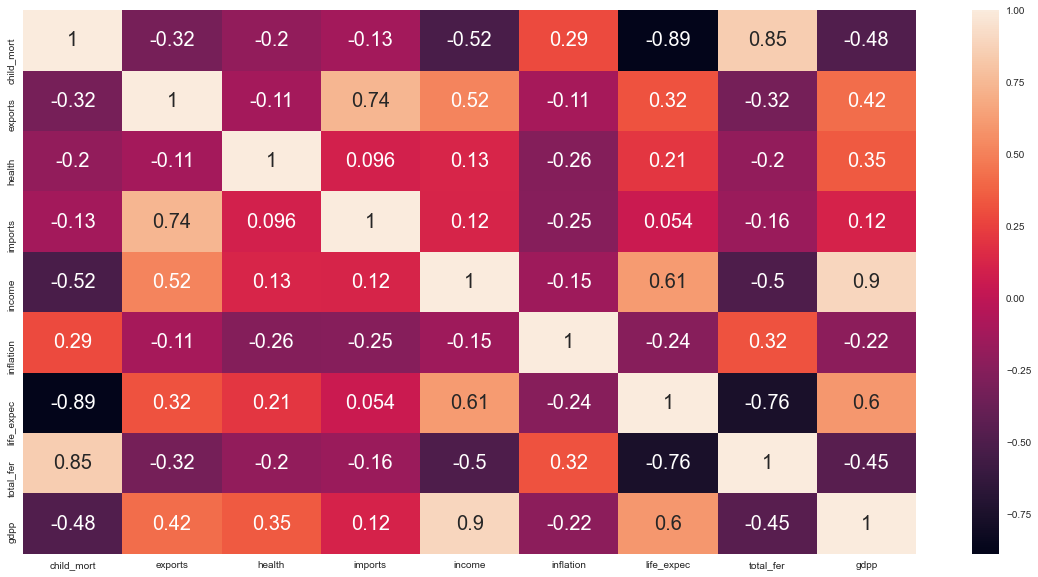

In [107]:
sns.heatmap(data.corr(method='pearson', min_periods=1), annot=True)

<AxesSubplot:>

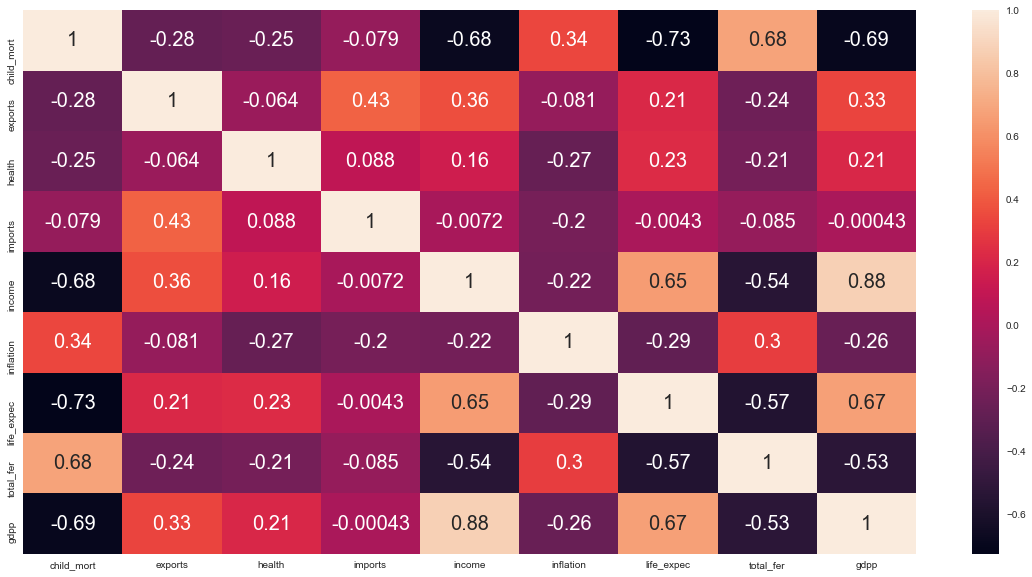

In [108]:
sns.heatmap(data.corr(method='kendall', min_periods=1), annot=True)

<AxesSubplot:>

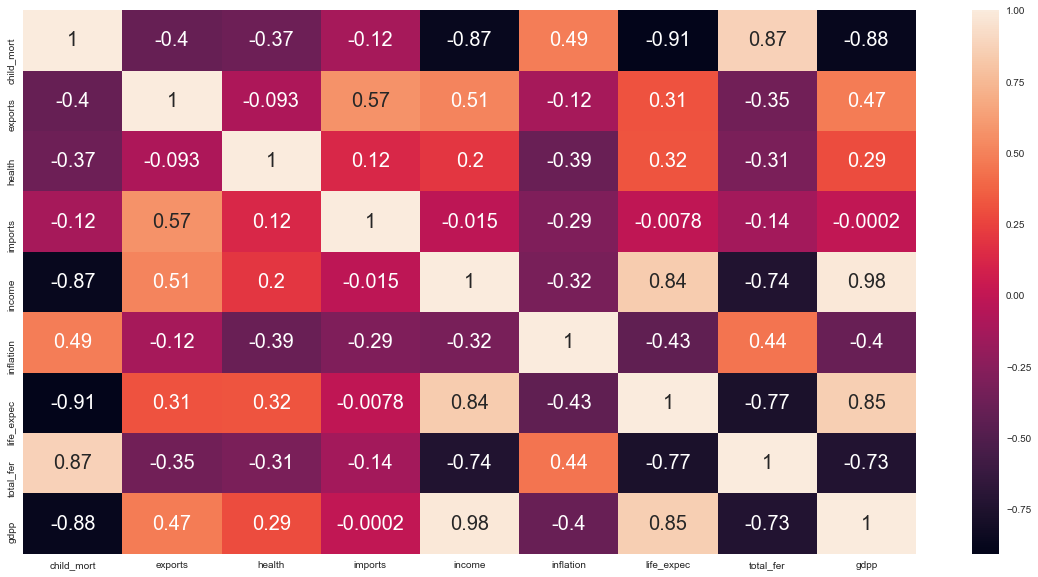

In [114]:
sns.heatmap(data.corr(method='spearman', min_periods=1),annot=True)

##### Insights on correlation
**Here the some features have high correlation with other , like as fallows..**
1. life_expect, due to high correlation with child mortality
2. total_fertility, due to high correlation with child mortality
3. income, due to high correlation with gdpp

**It will be good to not to consider these features**

## Model scaling 
1. Scaling is  a need for a model to work efficiently
2.  Some have large range hence model may build some affinity with the feature with large range
3.  THese affinity will add up some more biase to the dataset hence the  model become inefficient for new data.

In [126]:
#droping column 'country' which yeilds nothing for our analysis
new_df=data.drop(['country'],axis=1).copy()

In [129]:
## minmax scaling (normalization)
columns=new_df.columns

scaler=MinMaxScaler().fit(new_df)

## lets cross verify what difference minmax and stdscaler will make, 
##lets saparate the data sets scaled with minmac and std scaler

df_minmax=scaler.transform(new_df)
df_minmax

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [131]:
### StandardScaler

scaler_2=StandardScaler()

df_std=scaler_2.fit_transform(new_df)
df_std

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [133]:
df_MinMax=pd.DataFrame(data=df_minmax, columns=columns)
df_MinMax

child_mort   exports    health   imports    income  inflation  \
0      0.426485  0.049482  0.358608  0.257765  0.008047   0.126144   
1      0.068160  0.139531  0.294593  0.279037  0.074933   0.080399   
2      0.120253  0.191559  0.146675  0.180149  0.098809   0.187691   
3      0.566699  0.311125  0.064636  0.246266  0.042535   0.245911   
4      0.037488  0.227079  0.262275  0.338255  0.148652   0.052213   
..          ...       ...       ...       ...       ...        ...   
162    0.129503  0.232582  0.213797  0.302609  0.018820   0.063118   
163    0.070594  0.142032  0.192666  0.100809  0.127750   0.463081   
164    0.100779  0.359651  0.312617  0.460715  0.031200   0.150725   
165    0.261441  0.149536  0.209447  0.197397  0.031120   0.257000   
166    0.391918  0.184556  0.253574  0.177275  0.021473   0.168284   

     life_expec  total_fer      gdpp  
0      0.475345   0.736593  0.003073  
1      0.871795   0.078864  0.036833  
2      0.875740   0.274448  0.040365  
3      0.552268   0.790221  0.031488  
4      0.881657   0.154574  0.114242  
..          ...        ...       ...  
162    0.609467   0.370662  0.026143  
163    0.854043   0.208202  0.126650  
164    0.808679   0.126183  0.010299  
165    0.698225   0.555205  0.010299  
166    0.392505   0.670347  0.011731  

[167 rows x 9 columns]

In [136]:
## stdscaling is a rescaled where each features have std normal distribution with Std_deviation of 1 and Mean of 0
df_STD=pd.DataFrame(data=df_std, columns=columns)
df_STD

child_mort   exports    health   imports    income  inflation  \
0      1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   
1     -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347   
2     -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274   
3      2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   
4     -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749   
..          ...       ...       ...       ...       ...        ...   
162   -0.225578  0.200917 -0.571711  0.240700 -0.738527  -0.489784   
163   -0.526514 -0.461363 -0.695862 -1.213499 -0.033542   3.616865   
164   -0.372315  1.130305  0.008877  1.380030 -0.658404   0.409732   
165    0.448417 -0.406478 -0.597272 -0.517472 -0.658924   1.500916   
166    1.114951 -0.150348 -0.338015 -0.662477 -0.721358   0.590015   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

## comparing both scaling method

Text(0, 0.5, 'child mortality')

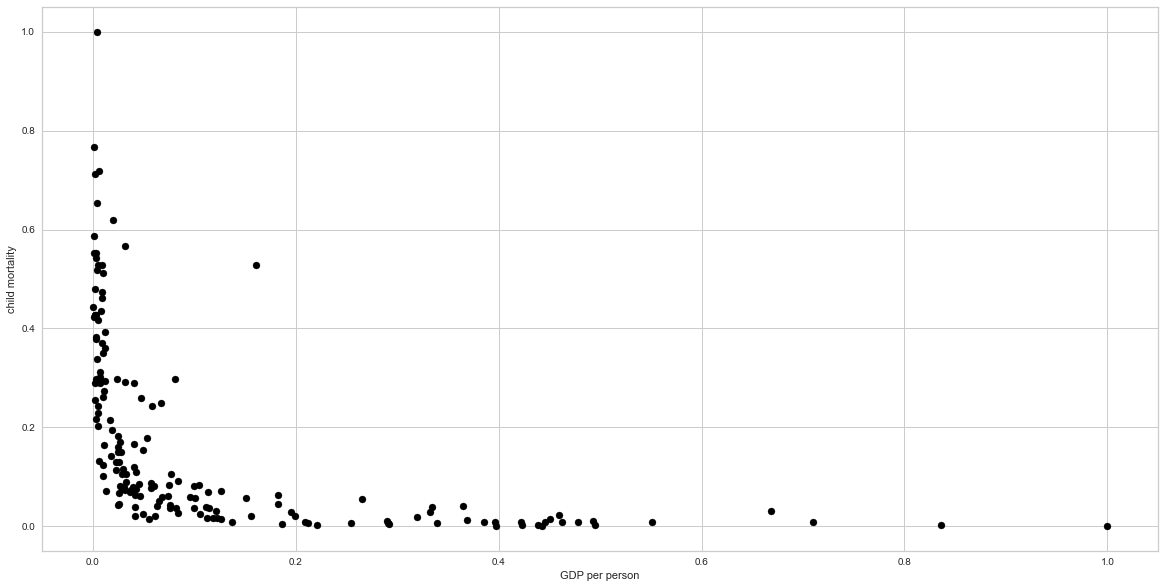

In [145]:
plt.scatter(df_MinMax['gdpp'],df_MinMax['child_mort'],color='black')

plt.xlabel('GDP per person')
plt.ylabel('child mortality')

Text(0, 0.5, 'child_mortality')

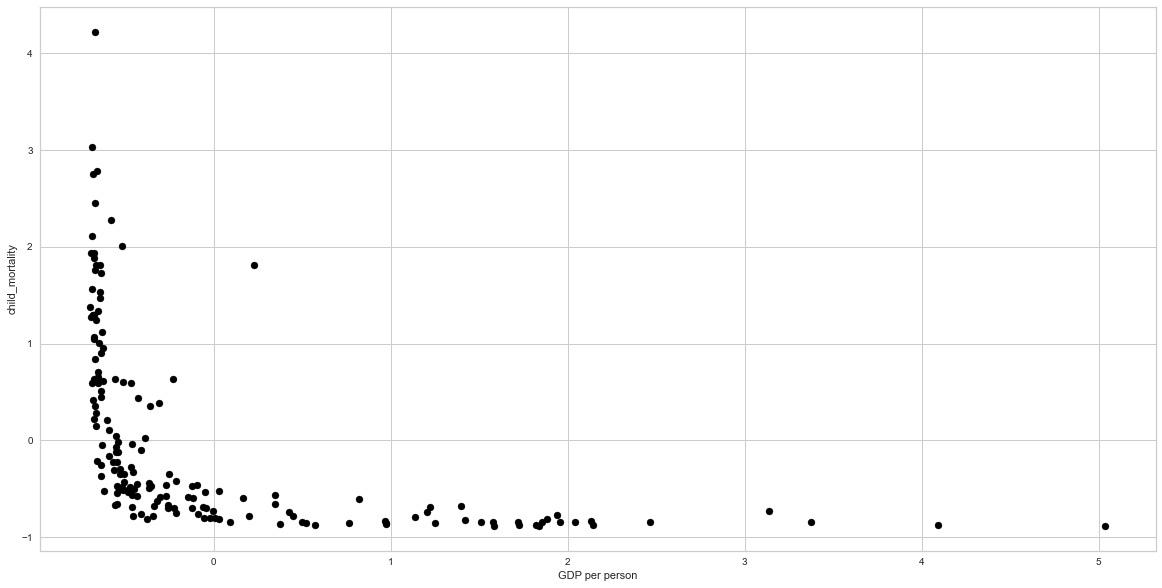

In [144]:
plt.scatter(df_STD['gdpp'],df_STD['child_mort'],color='black')

plt.xlabel('GDP per person')
plt.ylabel('child_mortality')

## PCA

1. we need to compute the co-variance of each possible pairs
2. and compute eigen values with the aid of co-variance matrix $$eigenvalue=det(covariancematrix-\lambda\times I)$$
3. finally we get the eigen vectors derived from the eigen values 
4. which inturn we get candidate line/principle component 

NOTE: we choose the PC based on the Eigen value, where in the top valued eigen values are use to get eigen vectors <br>
1. Number of Principle component we derived will always be equal to the number of features in dataset<br>
2. First PC will always contain maximum information of whole dataset, and after that second PC will contains the second highest infomation,.so on.....<br>

Ex: if we have 4 features and we computed 4 pc, out of 4PC 1st PC will contain 95% of Data and 2nd PC will have 5%


In [146]:
from sklearn.decomposition import PCA

##### PCA on MinMax

In [151]:
pca=PCA()

pca.fit(df_MinMax)
pca_minmax=pca.transform(df_MinMax)

In [155]:
pca.explained_variance_ratio_

array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964,
       0.03013659, 0.01190434, 0.00887791, 0.00694042])

In [158]:
pca_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=['PC'+str(x) for x in range(1,len(pca_var)+1)]

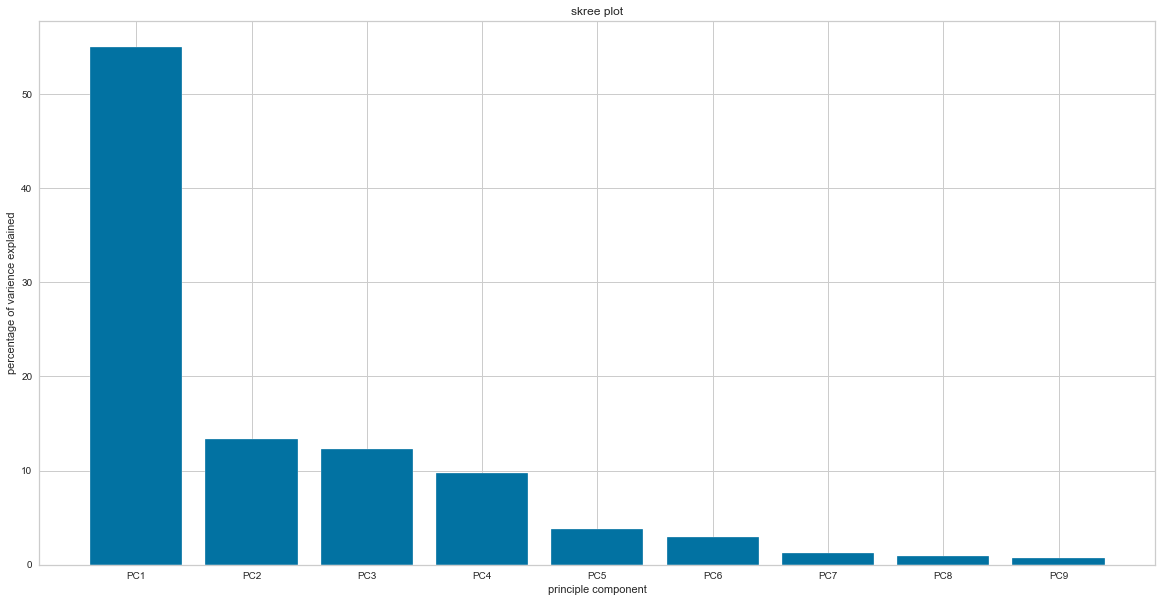

In [162]:
### percentage of explained variance by each PCA
mp.rcParams['font.size']=(20)
plt.bar(x=range(1,len(pca_var)+1), height=pca_var, tick_label=labels) #height is the value of each bar
plt.title('skree plot')
plt.xlabel('principle component')
plt.ylabel('percentage of variance explained')
plt.show()

In [168]:
pca_minmax_df=pd.DataFrame(data=pca_minmax, columns=labels)

Text(0, 0.5, 'PC2 - 13.4%')

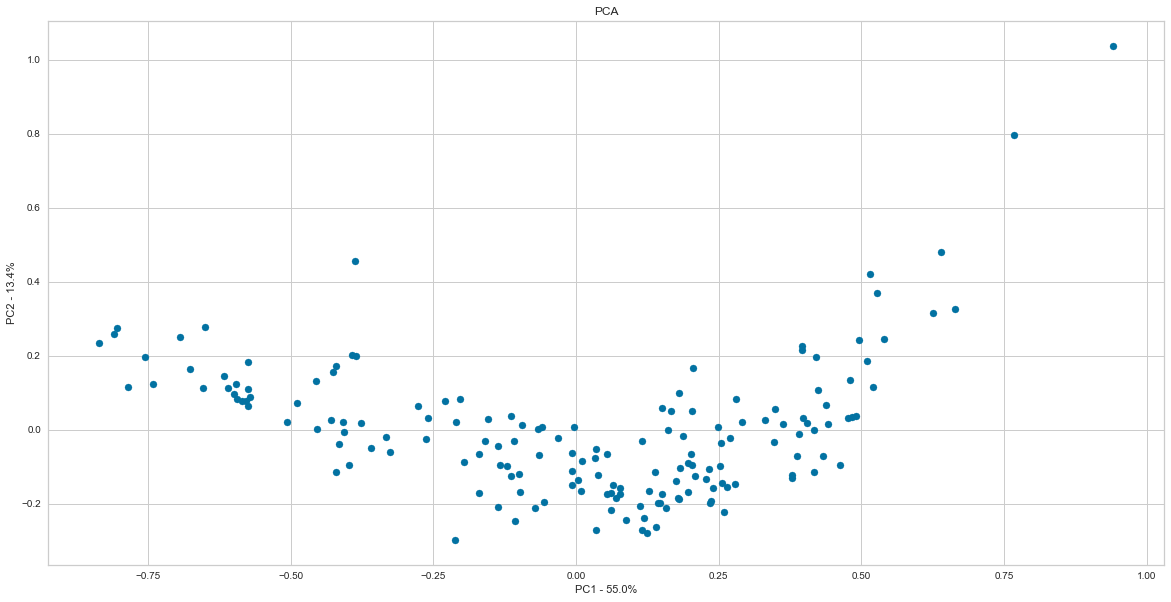

In [169]:
plt.scatter(pca_minmax_df.PC1, pca_minmax_df.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(pca_var[0]))
plt.ylabel('PC2 - {0}%'.format(pca_var[1]))

##### PCA on StandardScaler

In [174]:
df_STD.head(3)

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376

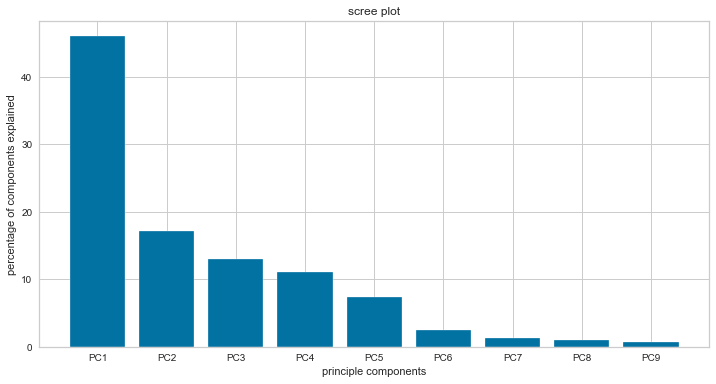

In [178]:
pca=PCA().fit(df_STD)
pca_std=pca.transform(df_STD)

### percentage variance ratio in each components
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=['PC'+str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(12,6))
## plotting the percentage of variance explained by each components
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.title('scree plot')
plt.xlabel('principle components')
plt.ylabel('percentage of components explained')
plt.show()

Text(0.5, 1.0, 'scatter_plot')

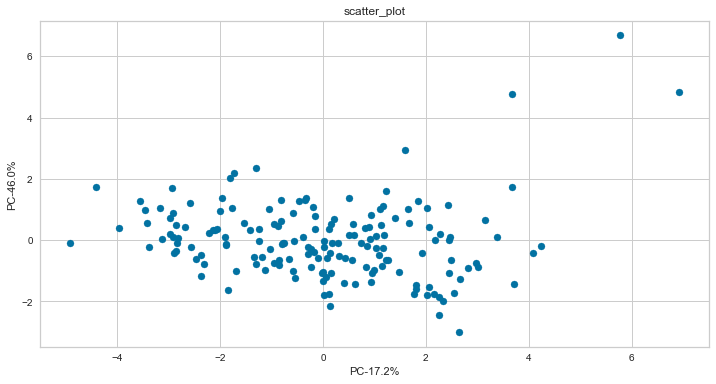

In [181]:
## lets look into the  pca's which contain more info

pc_std_df=pd.DataFrame(data=pca_std, columns=labels)
plt.figure(figsize=(12,6))
plt.scatter(pc_std_df.PC1, pc_std_df.PC2)
plt.ylabel('PC-{0}%'.format(per_var[0]))
plt.xlabel('PC-{0}%'.format(per_var[1]))
plt.title('scatter_plot')

#### WE can also explicity specify n_components before fitting data into PCA hence we get only specified number PCs contain nearly 95% or above of  information  

**After decomposing both minmax and std scaled dataset, we can see in both 4PCs explain more than 90% of data**<br>
**And scatter plot is more spread in std dataframe than the minmax hence variance is well explained in PCs formed by STD dataframe** 


In [186]:
data_2=pca_std_df.drop(['PC5','PC6','PC7','PC8','PC9'], axis=1)
data_2

PC1       PC2       PC3       PC4
0   -0.599078  0.095490  0.157554 -0.024333
1    0.158474 -0.212092 -0.064189 -0.061247
2    0.003686 -0.135867 -0.134182  0.133574
3   -0.650235  0.275975 -0.142672  0.156018
4    0.200711 -0.064662 -0.100715 -0.037902
..        ...       ...       ...       ...
162 -0.160078 -0.029625 -0.121910 -0.066099
163  0.061133 -0.171339 -0.058586  0.247460
164  0.115512 -0.032034 -0.195243 -0.231993
165 -0.332968 -0.019824 -0.029989  0.105416
166 -0.573897  0.108788  0.032552  0.044839

[167 rows x 4 columns]

#### K-Means on dataset scaled and decomposed by PCA

In [190]:
model=KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-4,random_state=0)

## n_clusters-->numbers clusters/centroid to create
## init--> 'random' choose n_clusters observations i.e rows randomly to form initial clusters 
## max_iter-->max number of iterations of the k-means for a single run
## tol-->  the relative tolerance with regards to Frobenius norm of the difference in the cluster centers of
###         two consecutive iterations to declare convergence
##n_init-->> no of iteration of k-means for a different number of centroid seed 

In [195]:
new_df.head(1)

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   

   total_fer  gdpp  
0       5.82   553

In [196]:
df_STD.head(1)

child_mort  exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.13828  0.279088 -0.082455 -0.808245   0.157336   -1.619092   

   total_fer     gdpp  
0   1.902882 -0.67918

In [193]:
df_MinMax.head(2)

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   

   total_fer      gdpp  
0   0.736593  0.003073  
1   0.078864  0.036833

In [197]:
## this is the PCA of standardscaled data
data_2.head(1)

PC1      PC2       PC3       PC4
0 -0.599078  0.09549  0.157554 -0.024333

In [200]:
## predicting on MinMaxscaled data
y_predict_minmax=model.fit_predict(df_MinMax)
y_predict_minmax

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [202]:
## predicting on Stdscaler
y_pred_std=model.fit_predict(df_STD)
y_pred_std

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [203]:
### Data_2 is the stdscaled and decomposed by PCA where we got 9pc out of which 4 PCs contained more info 

y_pred_pca=model.fit_predict(data_2)
y_pred_pca

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [206]:
### adding predictions to the respective data frame
df_MinMax['prediction']=y_predict_minmax

df_STD['prediction']=y_pred_std

new_df['prediction']=y_pred_pca

Text(0.5, 1.0, 'elbow curve method')

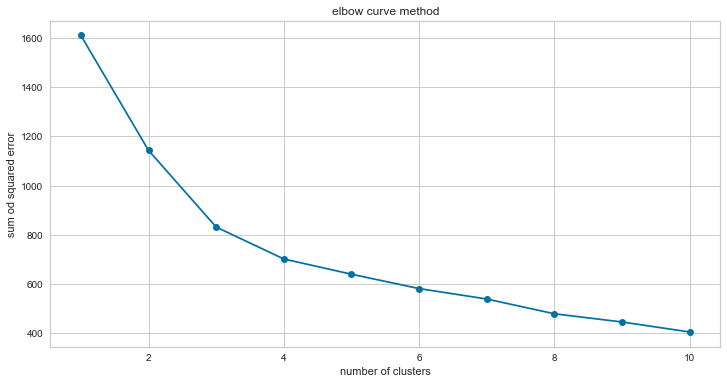

In [215]:
## calculate the inertia(sse sum of squared error/ distance between the near clusters)
## interia needs to be low, if it is low which means variance is low

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_STD)
    sse.append(km.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11), sse, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('sum od squared error')
plt.title('elbow curve method')

Text(0.5, 1.0, 'elbow curve method')

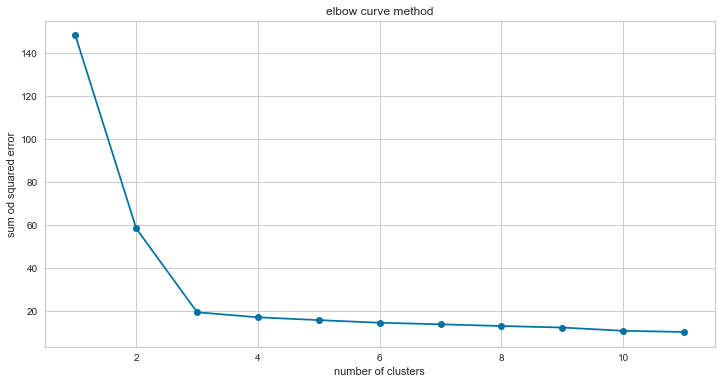

In [220]:
sse_mm=list() ## minmax scaled dataframe

for i in range(1,12):
    model_k=KMeans(n_clusters=i, init='random',n_init=10,
                   random_state=0,max_iter=300, tol=1e-04
    )
    model_k.fit(df_MinMax)
    sse_mm.append(model_k.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,12),sse_mm, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('sum od squared error')
plt.title('elbow curve method')

Text(0.5, 1.0, 'elbow curve method')

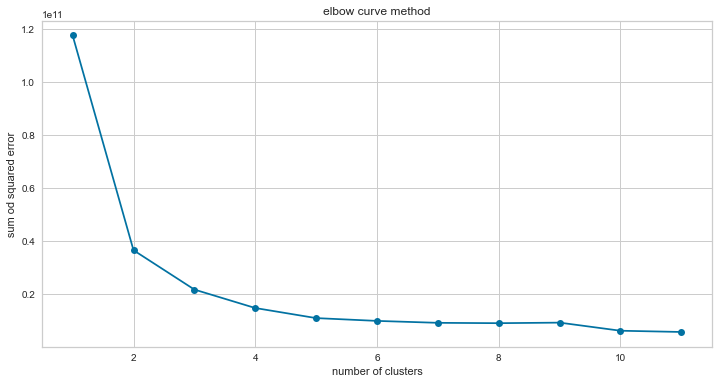

In [222]:
sse_o=list() ## original unscaled dataframe

for i in range(1,12):
    model_k=KMeans(n_clusters=i, init='random',n_init=10,
                   random_state=0,max_iter=300, tol=1e-04
    )
    model_k.fit(new_df)
    sse_o.append(model_k.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,12),sse_o, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('sum od squared error')
plt.title('elbow curve method')

Text(0.5, 1.0, 'elbow curve method')

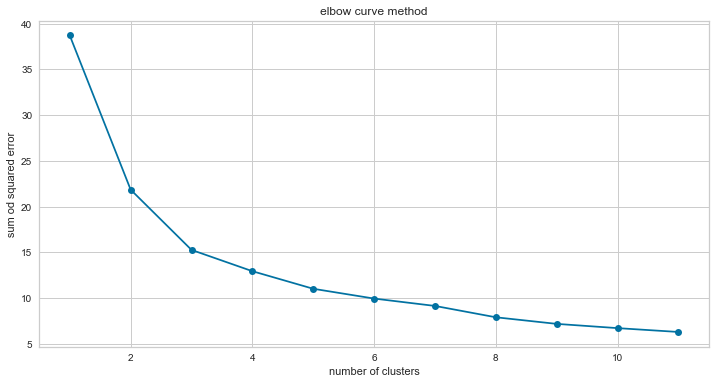

In [232]:
sse_pc=list() ## 4PC dataframe

for i in range(1,12):
    model_k=KMeans(n_clusters=i, init='random',n_init=10,
                   random_state=0,max_iter=300, tol=1e-04
    )
    model_k.fit(data_2)
    sse_pc.append(model_k.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,12),sse_pc, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('sum od squared error')
plt.title('elbow curve method')

In [231]:
km.labels_

array([9, 8, 3, 5, 6, 3, 3, 1, 1, 3, 8, 0, 3, 8, 6, 1, 6, 9, 6, 3, 8, 2,
       8, 0, 8, 9, 9, 6, 9, 1, 6, 9, 9, 8, 3, 8, 5, 9, 5, 8, 9, 8, 1, 1,
       1, 8, 8, 3, 8, 5, 5, 6, 6, 1, 1, 5, 5, 8, 1, 5, 1, 8, 8, 9, 9, 6,
       9, 6, 1, 3, 3, 3, 5, 1, 1, 1, 3, 1, 6, 3, 5, 2, 0, 6, 5, 6, 8, 2,
       2, 3, 6, 7, 8, 5, 9, 6, 6, 9, 7, 5, 6, 2, 8, 3, 8, 8, 9, 3, 2, 3,
       1, 1, 9, 4, 1, 3, 5, 6, 6, 3, 3, 8, 1, 0, 8, 3, 2, 6, 3, 5, 8, 6,
       9, 7, 1, 1, 2, 2, 1, 1, 3, 6, 5, 8, 1, 1, 3, 5, 6, 5, 9, 6, 6, 8,
       6, 9, 8, 0, 1, 1, 8, 3, 6, 3, 6, 5, 9])

#### After computing K-means and plotting elbow on each datasets we established we got 3 clusters as the optimal one

 **Optimal number of clusters: Silhouette Method**
 1. finding silhouette score for dataset
 2. visualizing for each dataset

In [238]:
#####************************standardized data***************************################
score = silhouette_score(df_STD, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)


### nearly 0 means number of clusters are overlapped, i,e some samples fall near decision boundary of nearest cluster 

Silhouette Score: 0.224


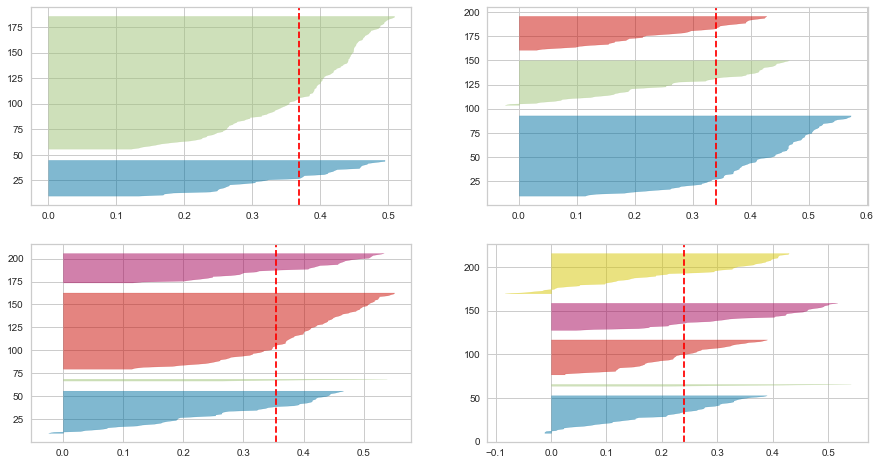

In [243]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    model_std = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(model_std, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_STD)

In [257]:
# *****************************************MINMAX scaled data*************************************************

score=silhouette_score(df_MinMax, km.labels_, metric='euclidean')

print('silhouette_score :%.3f' %score)

silhouette_score :0.225


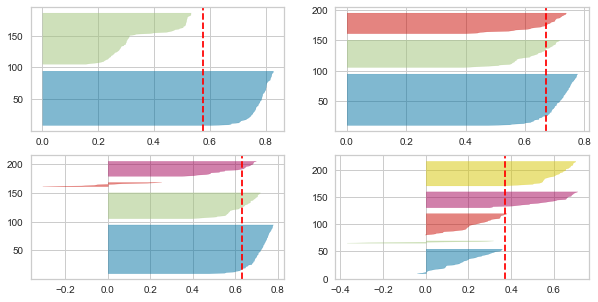

In [258]:
fig,ax=plt.subplots(2,2, figsize=(10,5))

for i in [2,3,4,5]:
    
    model_minmax=KMeans(n_clusters=i, init='random',n_init=10,max_iter=300, tol=1e-04,random_state=0)
    q,mod=divmod(i,2)
    visualizer=SilhouetteVisualizer(model_minmax, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_MinMax)

In [264]:
model_2=KMeans(n_clusters=i, init='random',n_init=10,max_iter=300, tol=1e-04,random_state=0)
model_2.fit(new_df)

KMeans(init='random', n_clusters=5, random_state=0)

In [268]:
#************************** original dataframe with PCA predictions**************************************

score=silhouette_score(new_df, model_k.labels_, metric='euclidean')
print('silhoutte score %.3f'%score)

#### getting negative means cluster formed is not good

silhoutte score -0.179


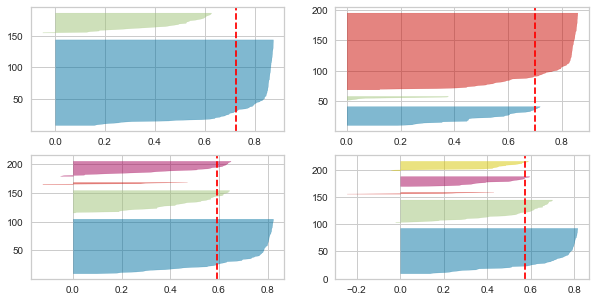

In [270]:
fig,ax=plt.subplots(2,2, figsize=(10,5))

for i in [2,3,4,5]:
    
    model_pc=KMeans(n_clusters=i, init='random',n_init=10,max_iter=300, tol=1e-04,random_state=0)
    q,mod=divmod(i,2)
    visualizer=SilhouetteVisualizer(model_pc, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(new_df)

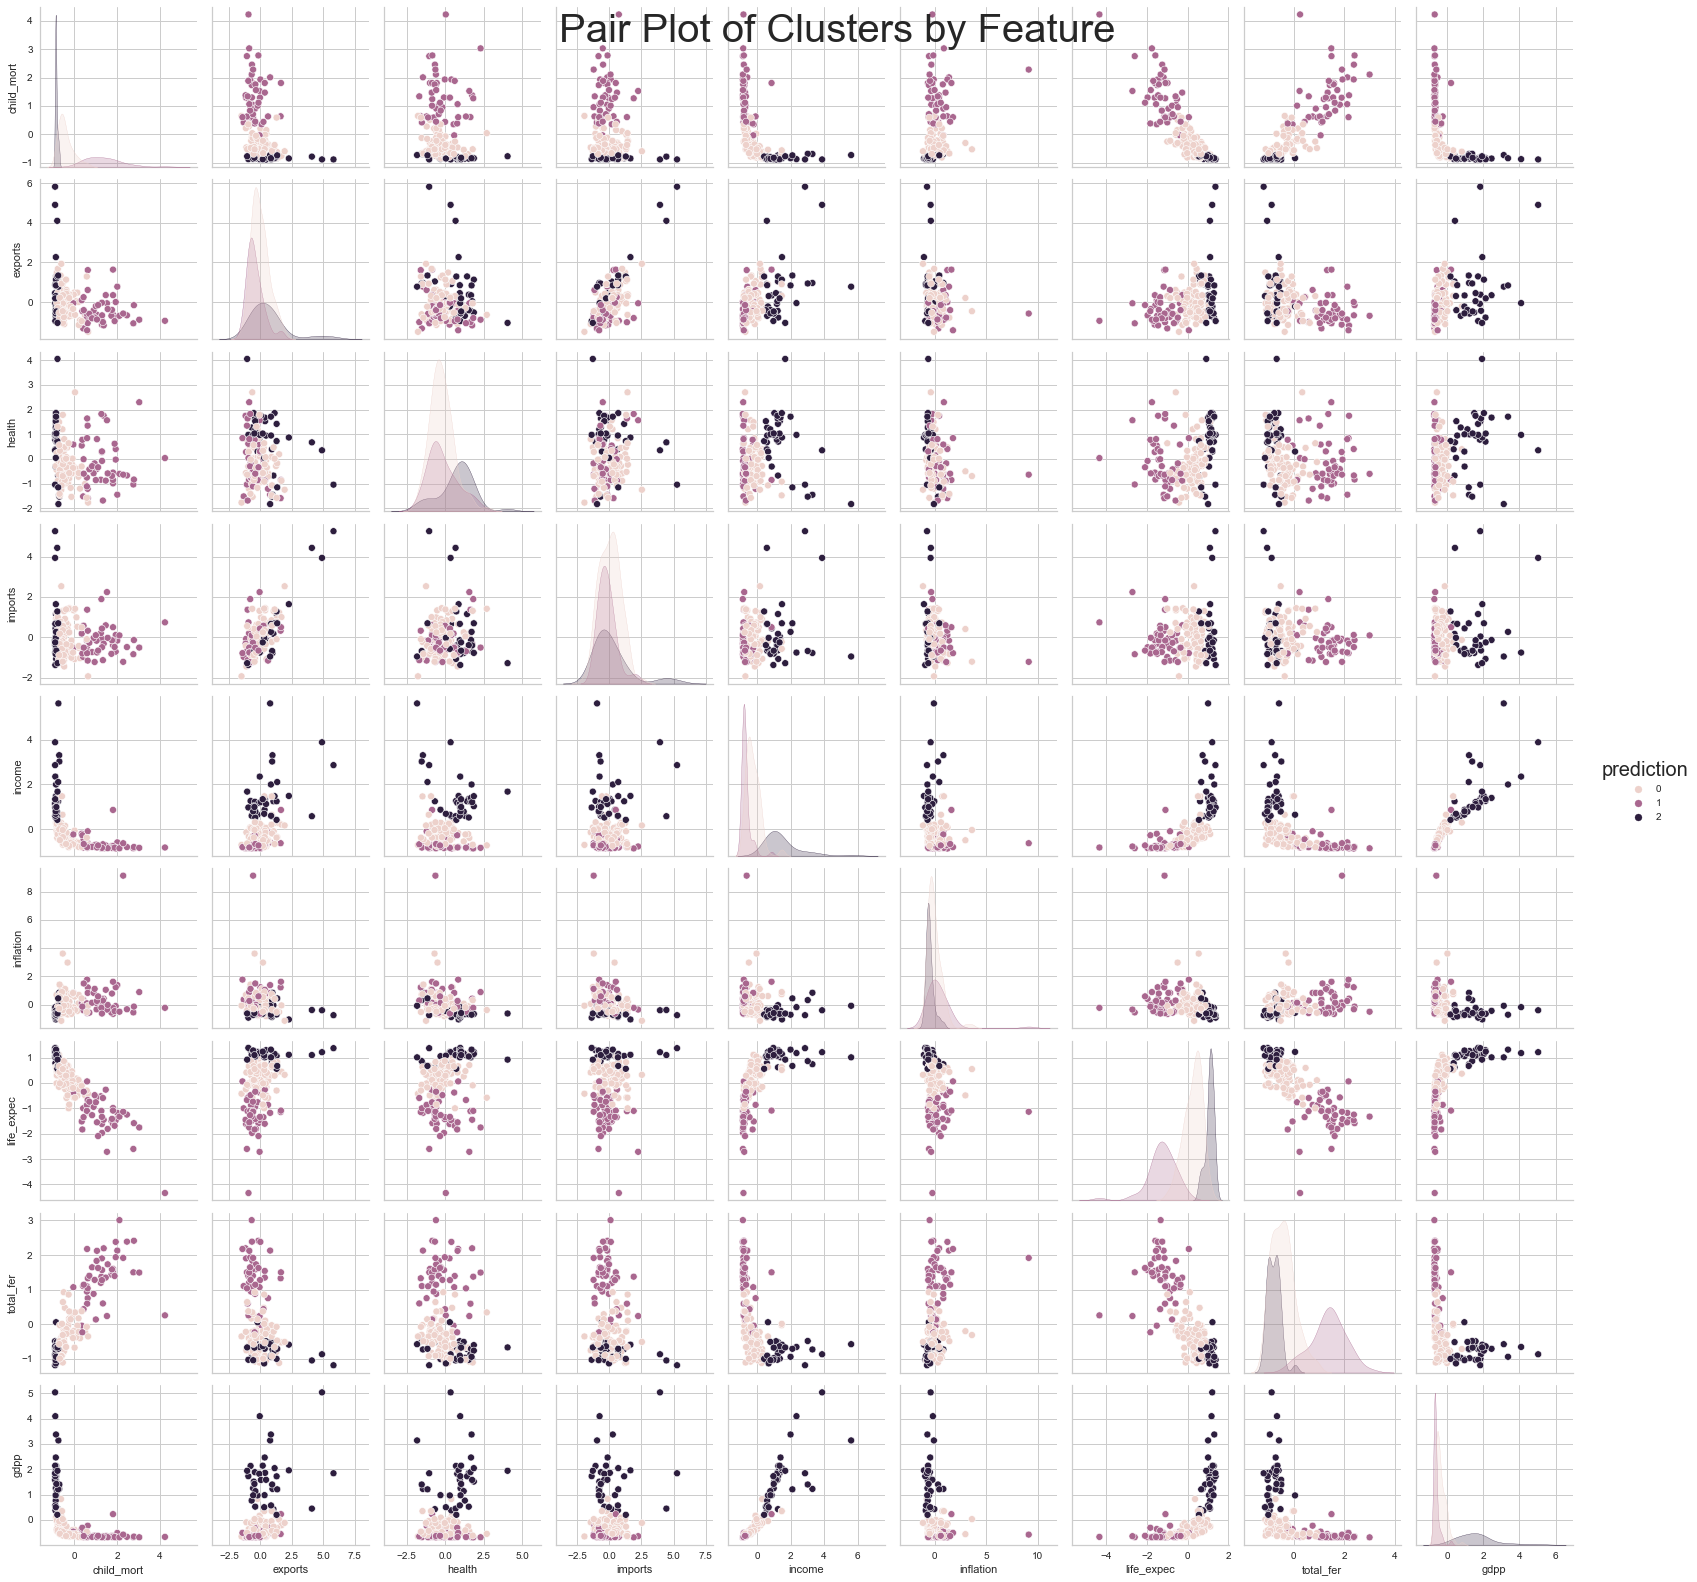

In [276]:
sns.pairplot(df_STD, hue="prediction")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 40);

Text(0.5, 0.98, 'pairplots of df scaled by MinMax')

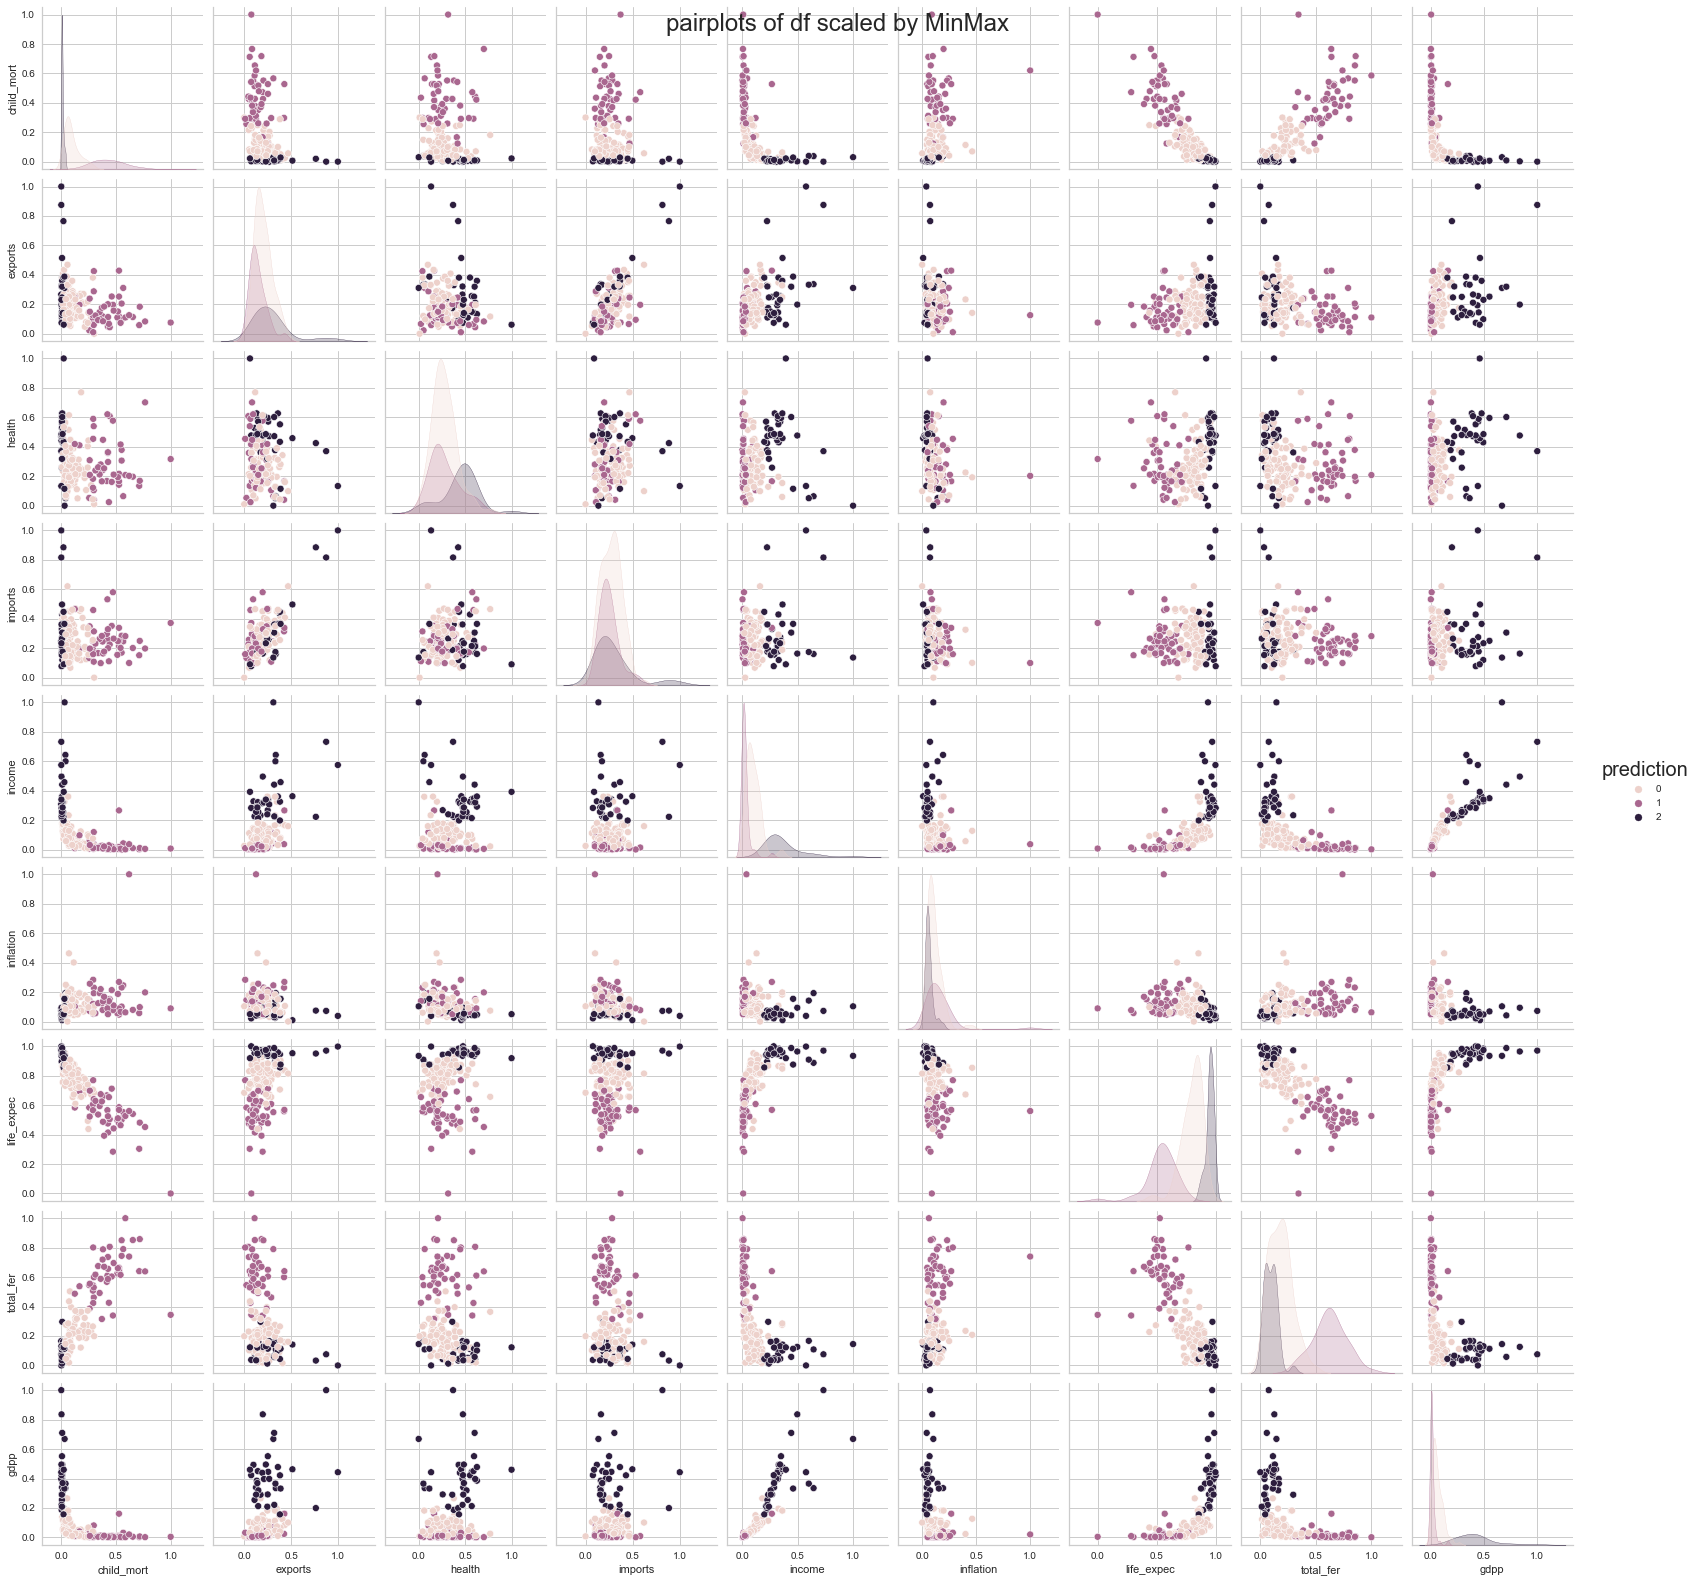

In [277]:
sns.pairplot(df_MinMax, hue='prediction')

plt.suptitle('pairplots of df scaled by MinMax')

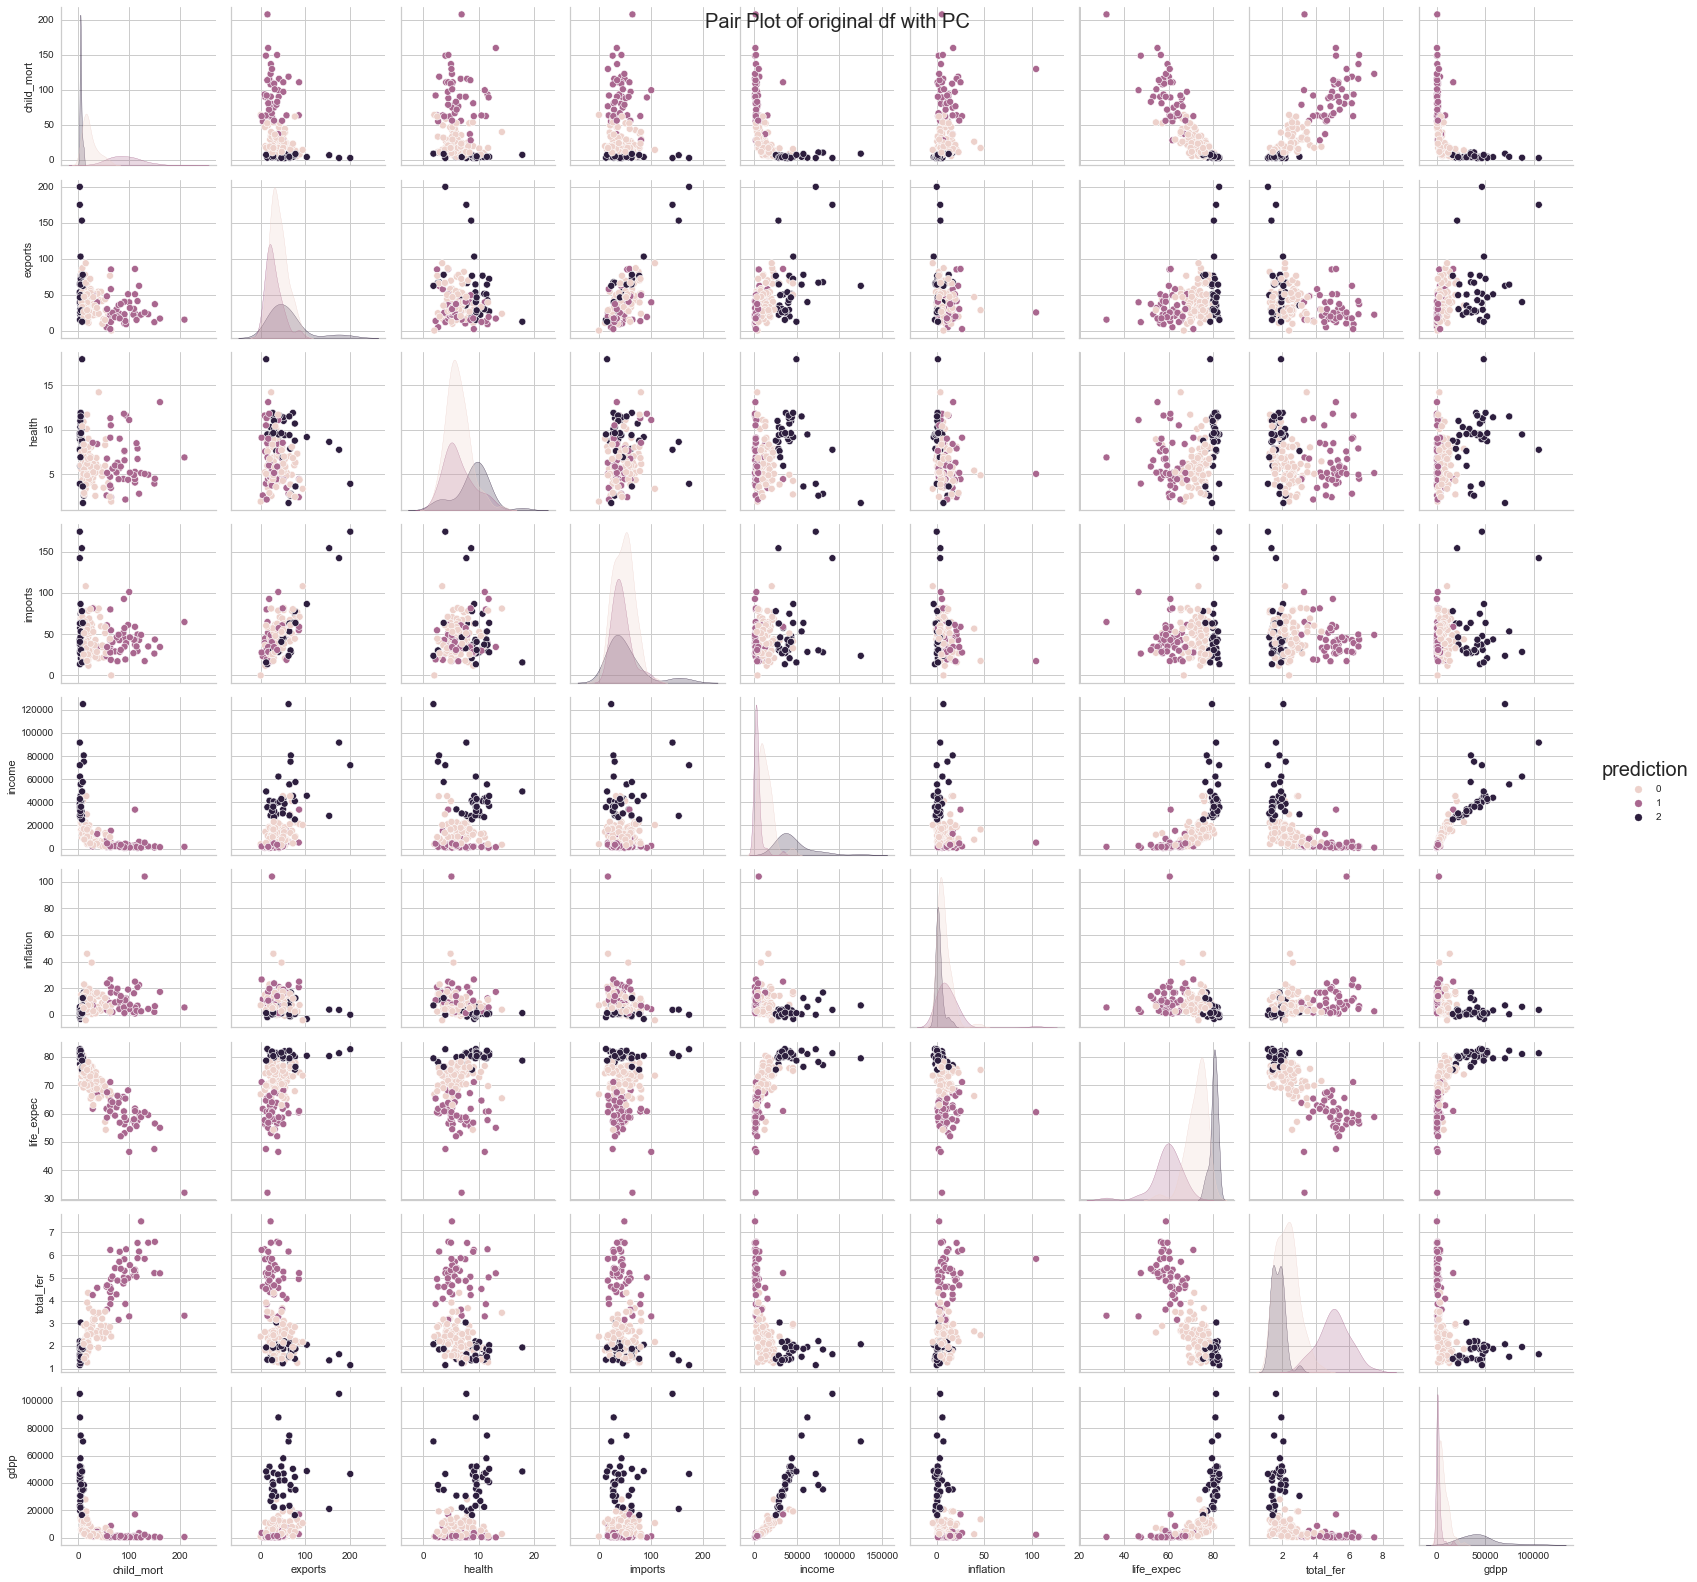

In [279]:
sns.pairplot(new_df, hue="prediction")

# title
plt.suptitle('Pair Plot of original df with PC', 
             size = 20);

**Observation**<br>

2nd cluster is more spread out and 0&1 clusters overlaped

### Lets take standard scaled predictions and join into the main data which contain country

In [281]:
data['cluster']=y_pred_std

In [282]:
data.head(5)

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  cluster  
0       9.44        56.2       5.82    553        1  
1       4.49        76.3       1.65   4090        0  
2      16.10        76.5       2.89   4460        0  
3      22.40        60.1       6.16   3530        1  
4       1.44        76.8       2.13  12200        0

Text(0.5, 0.98, 'pairplot on main data for each cluaters wrt cluster')

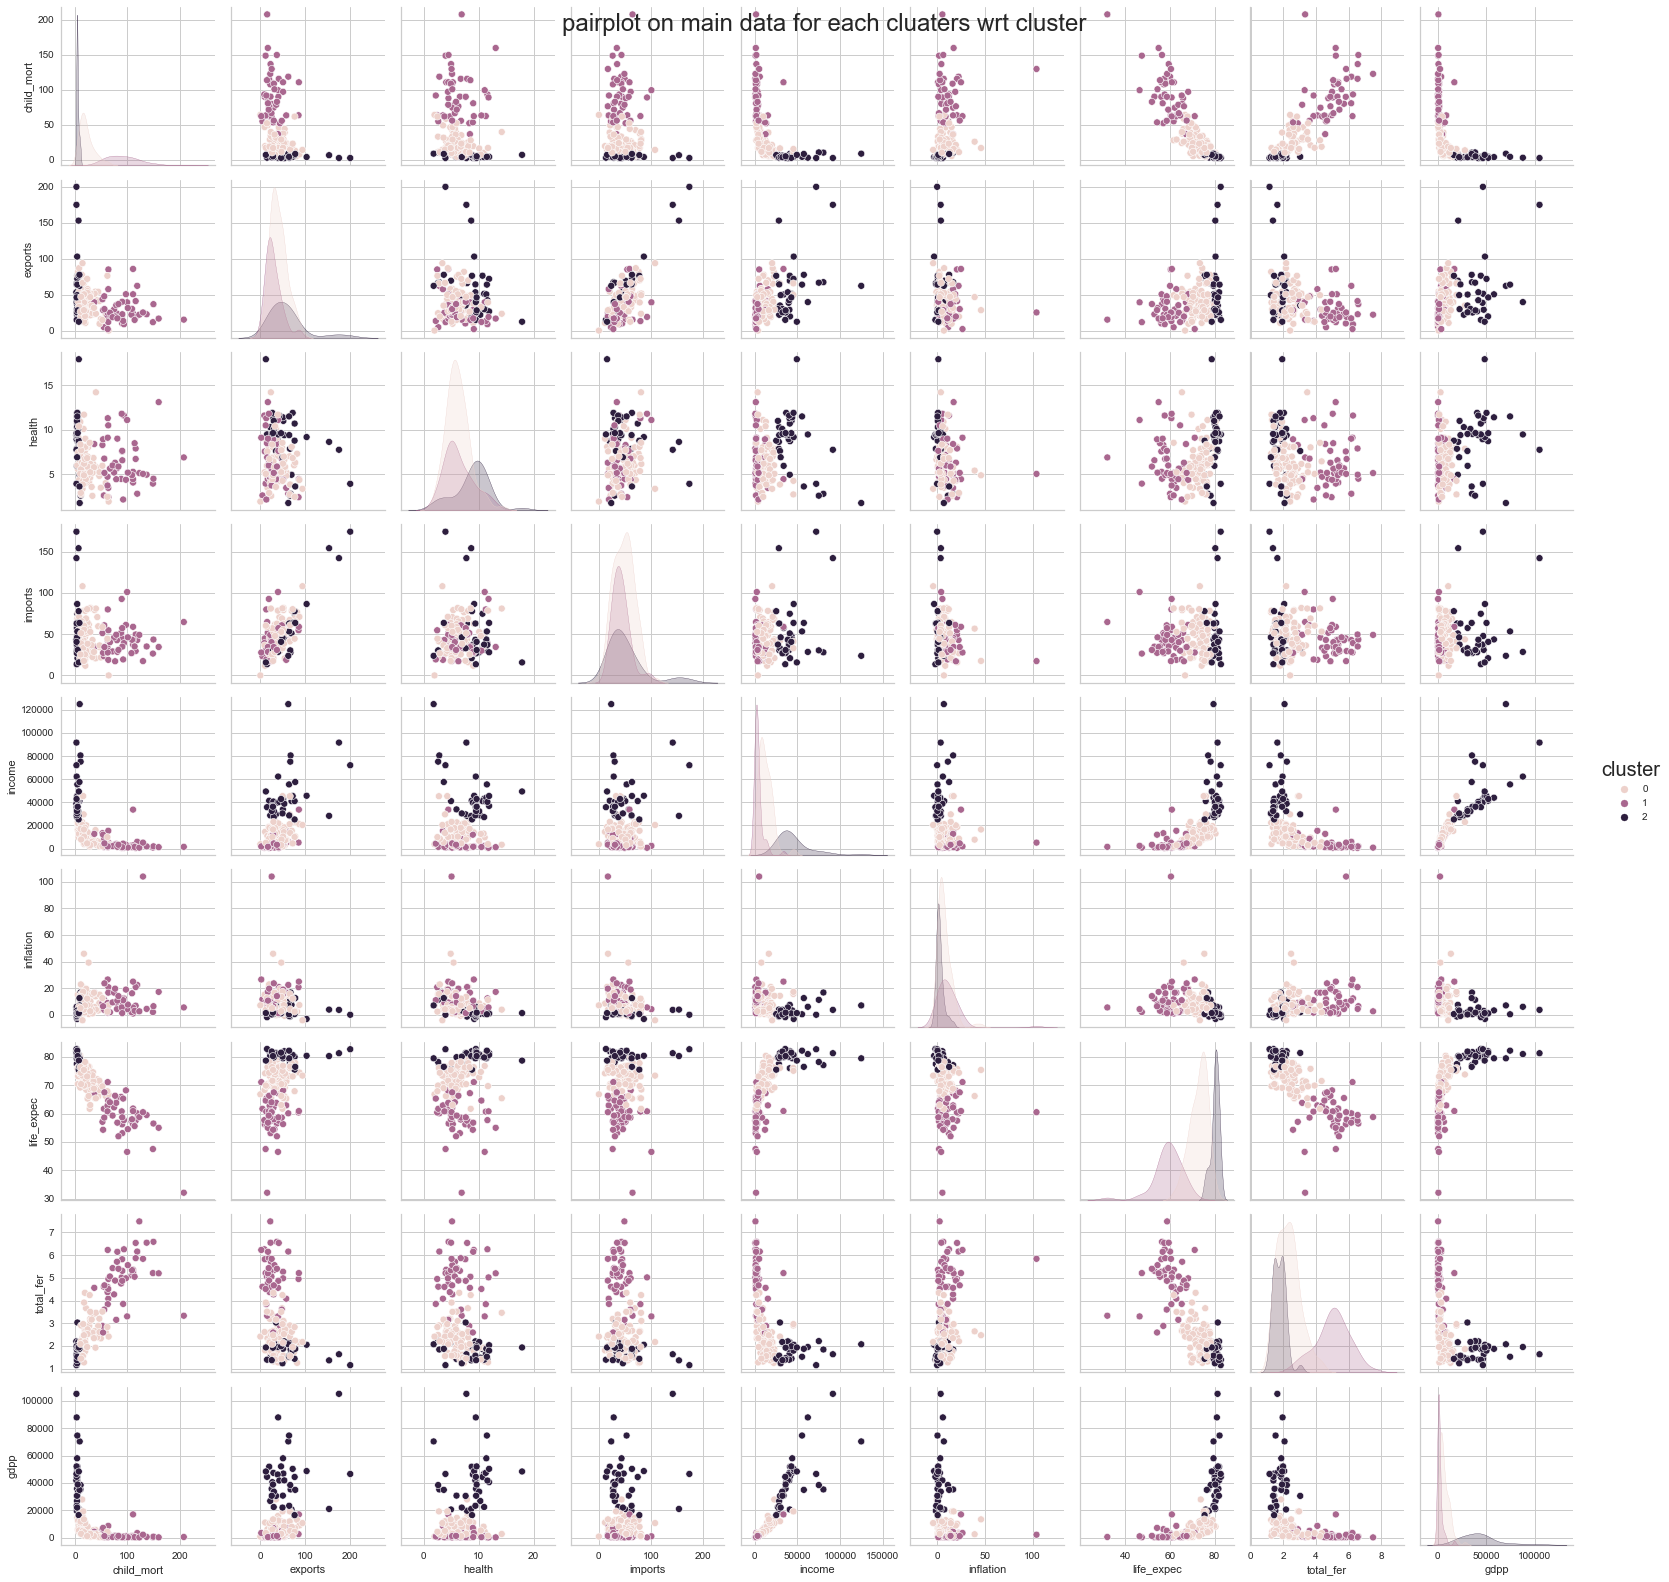

In [283]:
sns.pairplot(data, hue='cluster')
plt.suptitle('pairplot on main data for each cluaters wrt cluster')

In [286]:
### getting mean value on each features

df_mean=pd.pivot_table(data, index=['cluster'])
df_mean

child_mort    exports          gdpp    health    imports  \
cluster                                                             
0         21.927381  40.243917   6486.452381  6.200952  47.473404   
1         92.961702  29.151277   1922.382979  6.388511  42.323404   
2          5.000000  58.738889  42494.444444  8.807778  51.491667   

               income  inflation  life_expec  total_fer  
cluster                                                  
0        12305.595238   7.600905   72.814286   2.307500  
1         3942.404255  12.019681   59.187234   5.008085  
2        45672.222222   2.671250   80.127778   1.752778

In [304]:
cluster_0=data[data['cluster']==0]

print(len(cluster_0.country))
cluster_0.country.unique()

84


array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia',
       'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia',
       'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic',
       'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR',
       'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
       'Seychelles', 'Solomon Islands', 'Sri Lanka',
       'St. Vincent and the Grenadines'

#### CLuster 0 is has the countries having a not so worse condition 
1. child_mort-avg
2. exports-avg
3. gdpp-avg
4. health -avg and same has cluster-1
5. imports- avg
6. income- avg
7. inflation- avg
8. life_expec- 70+ years 
9. total_fert-not bad, 2 children per woman (number of children that would be born to each woman if the current age-fertility rates remain the same)

In [302]:
## lets divide the counties based on the data
cluster_1=data[data['cluster']==1]

print(len(cluster_1.country))
cluster_1.country.unique()

47


array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen',
       'Zambia'], dtype=object)

#### CLuster 1 is has the countries having a  worse condition when it comes to child_mortality, income, life-expectency, etc 
1. child_mort-high
2. exports-low
3. gdpp- very low
4. health -avg and same has cluster-0
5. imports- avg
6. income- vey low
7. inflation- high
8. life_expec- 55+ years, veyr worse condition 
9. total_fert-highest, 5 children per woman (number of children that would be born to each woman if the current age-fertility rates remain the same)

In [306]:
cluster_2=data[data['cluster']==2]

print(len(cluster_0.country))
cluster_2.country.unique()

84


array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [307]:
df_mean=pd.pivot_table(data, index=['cluster'])
df_mean

child_mort    exports          gdpp    health    imports  \
cluster                                                             
0         21.927381  40.243917   6486.452381  6.200952  47.473404   
1         92.961702  29.151277   1922.382979  6.388511  42.323404   
2          5.000000  58.738889  42494.444444  8.807778  51.491667   

               income  inflation  life_expec  total_fer  
cluster                                                  
0        12305.595238   7.600905   72.814286   2.307500  
1         3942.404255  12.019681   59.187234   5.008085  
2        45672.222222   2.671250   80.127778   1.752778

#### CLuster 2 has the countries having a  good condition when it comes to child_mortality, income, life-expectency, etc 
1. child_mort- very low
2. exports- above avg
3. gdpp- very high
4. health -higher than any other cluster
5. imports- above avg
6. income- highest
7. inflation- very low
8. life_expec- 80+ years, condition is very good 
9. total_fert-very low, 1 children per woman (number of children that would be born to each woman if the current age-fertility rates remain the same)

In [308]:
import geopandas as gpd
from geopandas import GeoDataFrame as gdf

In [312]:
# load example data from geodataframe 
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_df.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [318]:
### countries in gpd 
print(sorted(world_df['name'].unique()))
### countries in our data
print(sorted(data['country'].unique()))

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', '

In [323]:
world_list=sorted(world_df['name'].unique())

data_list=sorted(data['country'].unique())


In [324]:
country_diff=list()
for n in world_list:
    if n not in data_list:
        country_diff.append(n)
        
country_diff
    

['Antarctica',
 'Bosnia and Herz.',
 'Central African Rep.',
 'Congo',
 'Cuba',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Djibouti',
 'Dominican Rep.',
 'Eq. Guinea',
 'Ethiopia',
 'Falkland Is.',
 'Fr. S. Antarctic Lands',
 'Greenland',
 'Honduras',
 'Kosovo',
 'Kyrgyzstan',
 'Laos',
 'Macedonia',
 'Mexico',
 'N. Cyprus',
 'New Caledonia',
 'Nicaragua',
 'North Korea',
 'Palestine',
 'Papua New Guinea',
 'Puerto Rico',
 'S. Sudan',
 'Slovakia',
 'Solomon Is.',
 'Somalia',
 'Somaliland',
 'Syria',
 'Taiwan',
 'Trinidad and Tobago',
 'United States of America',
 'W. Sahara',
 'Zimbabwe',
 'eSwatini']

In [325]:
##### we got to know that these countries names are different(half written)
world_df['name'] = world_df['name'].replace(
    ['Bosnia and Herz.', 'Central African Rep.', 'Congo', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Dominican Rep.', 'Eq. Guinea', 'Macedonia', 'Myanmar',
     'N. Cyprus', 'S. Sudan', 'Slovakia', 'Solomon Is.', 'United States of America'],
    ['Bosnia and Herzegovina','Central African Republic','Congo, Rep.',"Cote d'Ivoire",'Congo, Dem. Rep.','Dominican Republic','Equatorial Guinea',
     'Macedonia, FYR','Myanmar','Cyprus','Sudan','Slovak Republic','Solomon Islands','United States'])

In [326]:
world_copy=world_df.copy()
world_copy.rename(columns={'name':'country'}, inplace=True)
world_copy

pop_est      continent              country iso_a3  gdp_md_est  \
0       920938        Oceania                 Fiji    FJI      8374.0   
1     53950935         Africa             Tanzania    TZA    150600.0   
2       603253         Africa            W. Sahara    ESH       906.5   
3     35623680  North America               Canada    CAN   1674000.0   
4    326625791  North America        United States    USA  18560000.0   
..         ...            ...                  ...    ...         ...   
172    7111024         Europe               Serbia    SRB    101800.0   
173     642550         Europe           Montenegro    MNE     10610.0   
174    1895250         Europe               Kosovo    -99     18490.0   
175    1218208  North America  Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [333]:
world_data=pd.merge(data, world_copy, on='country', how='inner')
world_data.head(3)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   
2      Algeria        27.3     38.4    4.17     31.4   12900      16.10   

   life_expec  total_fer  gdpp  cluster   pop_est continent iso_a3  \
0        56.2       5.82   553        1  34124811      Asia    AFG   
1        76.3       1.65  4090        0   3047987    Europe    ALB   
2        76.5       2.89  4460        0  40969443    Africa    DZA   

   gdp_md_est                                           geometry  
0     64080.0  POLYGON ((66.51861 37.36278, 67.07578 37.35614...  
1     33900.0  POLYGON ((21.02004 40.84273, 20.99999 40.58000...  
2    609400.0  POLYGON ((-8.68440 27.39574, -8.66512 27.58948...

In [336]:
!pip install geoplot --upgrade --quiet

^C


In [ ]:
!pip install mapclassify

In [348]:

import plotly.offline as po
import plotly.graph_objs as pg

In [351]:
import plotly.express as px

fig = px.choropleth(world_data, locations=world_data['country'],
                    color='cluster', 
                    hover_name="country", 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

c:\users\swaro\appdata\local\programs\python\python37\lib\site-packages\mapclassify\classifiers.py:1718: UserWarning:


c:\users\swaro\appdata\local\programs\python\python37\lib\site-packages\mapclassify\classifiers.py:1719: UserWarning:




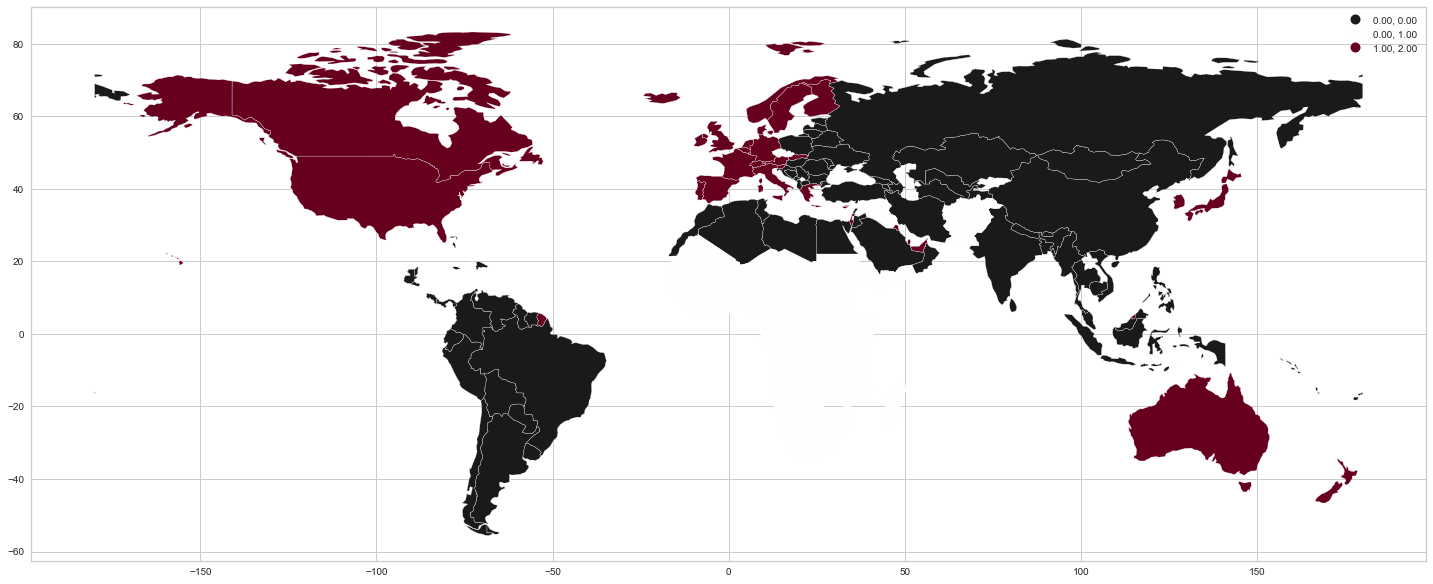

In [381]:
import mapclassify
world_data.plot(column='cluster', scheme="NaturalBreaks",
           figsize=(25, 20),
           legend=True,cmap='RdGy_r');

In [388]:
new_k=new_df.drop(['prediction'], axis=1).copy()

In [384]:
from sklearn.cluster import MiniBatchKMeans

In [403]:
kmeans=MiniBatchKMeans(n_clusters=3,
                   random_state=0,
                   batch_size=6,
                   max_iter=10)

In [404]:
kmeans.partial_fit(new_k)

MiniBatchKMeans(batch_size=6, max_iter=10, n_clusters=3, random_state=0)

In [405]:
pred=kmeans.predict(new_k)
pred

array([0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2,
       0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0])

In [406]:
kmeans.inertia_

27567775786.952568

###### do not use mini batch kmeans in the case of small data, as we can see here inertia is sky rocketing

#### By for what ever the steps we fallowed it did not made any difference 
**lets add another column called Multidimensional Poverty Index (MPI)**

For this we'll incorporate a new feature called Multidimensional Poverty Index (MPI) from the Multidimensional Poverty Measures dataset.

The global Multidimensional Poverty Index (MPI) is an international measure of acute multidimensional poverty covering over 100 developing countries. It complements traditional monetary poverty measures by capturing the acute deprivations in health, education, and living standards that a person faces simultaneously. Read more about the MPI here.

In [408]:
data_mpi=pd.read_csv('C:/Users/swaro/Downloads/MPI_national.csv')

In [409]:
data_mpi

ISO                   Country  MPI Urban  Headcount Ratio Urban  \
0    KAZ                Kazakhstan      0.000                    0.0   
1    SRB                    Serbia      0.000                    0.1   
2    KGZ                Kyrgyzstan      0.000                    0.1   
3    TUN                   Tunisia      0.000                    0.1   
4    ARM                   Armenia      0.001                    0.2   
..   ...                       ...        ...                    ...   
97   CAF  Central African Republic      0.289                   58.2   
98   LBR                   Liberia      0.290                   60.5   
99   SOM                   Somalia      0.293                   55.9   
100  TCD                      Chad      0.351                   64.8   
101  SSD               South Sudan      0.459                   82.5   

     Intensity of Deprivation Urban  MPI Rural  Headcount Ratio Rural  \
0                              33.3      0.000                   0.09   
1                              41.4      0.002                   0.50   
2                              40.2      0.003                   0.70   
3                              35.6      0.012                   3.18   
4                              33.3      0.001                   0.39   
..                              ...        ...                    ...   
97                             49.7      0.519                  89.79   
98                             48.0      0.481                  84.86   
99                             52.4      0.651                  96.92   
100                            54.1      0.609                  93.41   
101                            55.7      0.591                  94.00   

     Intensity of Deprivation Rural  
0                              33.3  
1                              40.3  
2                              37.1  
3                              38.7  
4                              36.9  
..                              ...  
97                             57.8  
98                             56.6  
99                             67.2  
100                            65.2  
101                            62.8  

[102 rows x 8 columns]

In [423]:
### we don't need any other columns except mpi urban and mpi rural, also we need country column to merge
### here MPI acts as a dependent variable and all other features we worked on will works as independent feature

mpi_data_new=data_mpi.drop(['ISO','Headcount Ratio Urban','Intensity of Deprivation Urban','Headcount Ratio Rural',
                             'Intensity of Deprivation Rural'], axis=1)
                            


In [427]:
mpi_data_new.rename(columns={'Country':'country',
                   'MPI Urban':'mpi_urban',
                   'MPI Rural':'mpi_rural'}, inplace=True)

In [428]:
mpi_data_new

country  mpi_urban  mpi_rural
0                  Kazakhstan      0.000      0.000
1                      Serbia      0.000      0.002
2                  Kyrgyzstan      0.000      0.003
3                     Tunisia      0.000      0.012
4                     Armenia      0.001      0.001
..                        ...        ...        ...
97   Central African Republic      0.289      0.519
98                    Liberia      0.290      0.481
99                    Somalia      0.293      0.651
100                      Chad      0.351      0.609
101               South Sudan      0.459      0.591

[102 rows x 3 columns]

In [419]:
data=pd.read_csv('C:/Users/swaro/Downloads/country_data.csv')

In [420]:
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [429]:
merged_df=pd.merge(data,mpi_data_new, on='country', how='inner')

In [440]:
?sns.histplot

<AxesSubplot:xlabel='mpi_urban', ylabel='Density'>

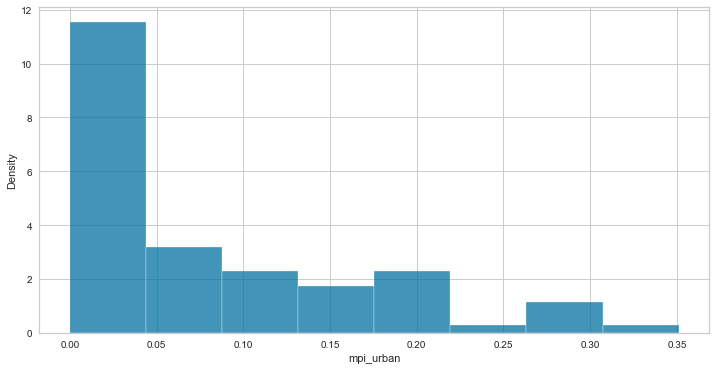

In [443]:
plt.figure(figsize=(12,6))
sns.histplot(data=merged_df, x='mpi_urban', stat='density')

<AxesSubplot:xlabel='mpi_rural', ylabel='Density'>

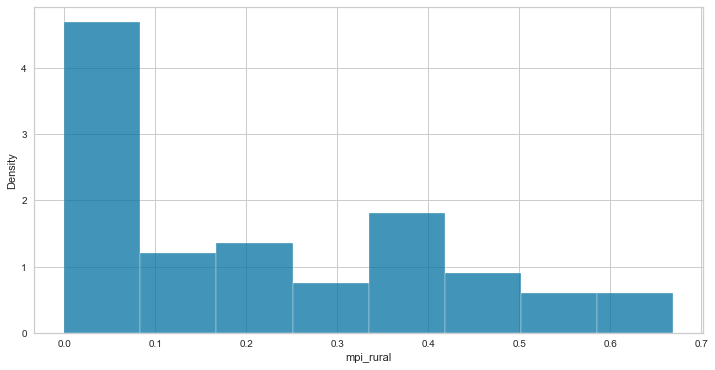

In [444]:
plt.figure(figsize=(12,6))
sns.histplot(data=merged_df, x='mpi_rural', stat='density')

<AxesSubplot:>

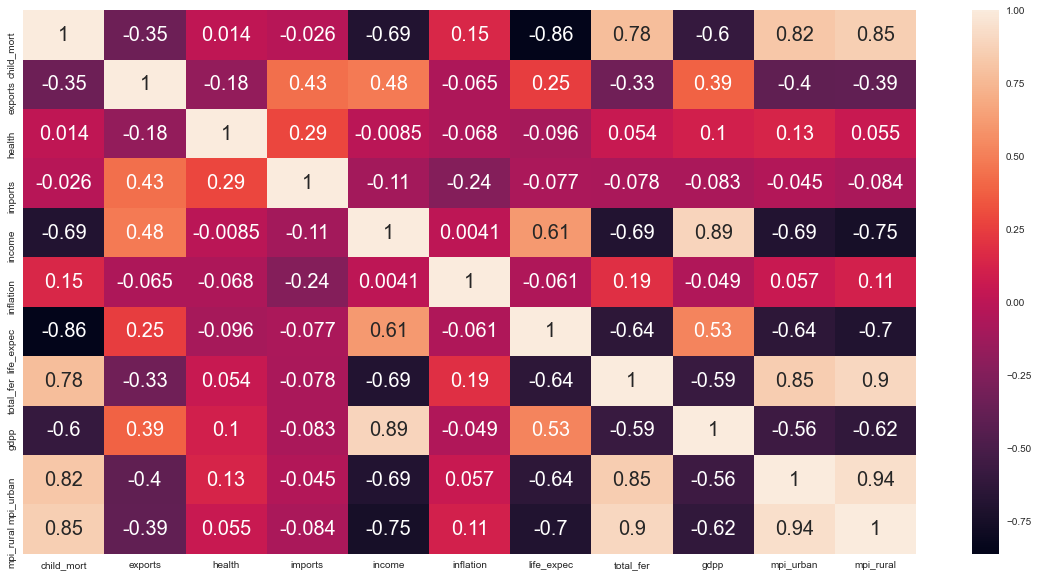

In [450]:
sns.heatmap(merged_df.corr(method='pearson', min_periods=1), annot=True)

***Insights**<br>
MPI urban and rural have high correlation. MPI urban to be considered as DV. Features with high correlation with MPI urban are child_mort, income, life_expect, total_fer, gdpp. We'll keep child_mort and not use life_expect and total_fer as they are highly correlated and there might be multicollinearity between them.

In [453]:
!pip install statsmodels

In [454]:
# create linear regression class object 
reg = linear_model.LinearRegression()

# libraries for plotting of residual plots
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [456]:
merged_df.head(2)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   

   life_expec  total_fer  gdpp  mpi_urban  mpi_rural  
0        56.2       5.82   553      0.132      0.347  
1        76.3       1.65  4090      0.003      0.007

                            OLS Regression Results                            
Dep. Variable:              mpi_rural   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     208.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.30e-23
Time:                        22:52:06   Log-Likelihood:                 68.706
No. Observations:                  79   AIC:                            -133.4
Df Residuals:                      77   BIC:                            -128.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0207      0.020     -1.026      0.3

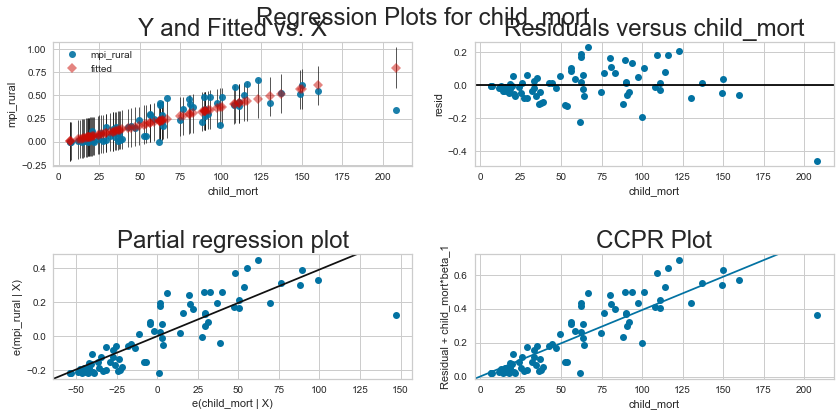

In [459]:
model=ols('mpi_rural~child_mort', data=merged_df).fit()


###mode summery
print(model.summary())


#define figure size
fig = plt.figure(figsize=(12,6))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'child_mort', fig=fig)

In [474]:
def reg_model(col,model):
    
    print(model.summary())
    fig=plt.figure(figsize=(12,6))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)

                            OLS Regression Results                            
Dep. Variable:              mpi_rural   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     14.03
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           0.000346
Time:                        23:46:18   Log-Likelihood:                 23.556
No. Observations:                  79   AIC:                            -43.11
Df Residuals:                      77   BIC:                            -38.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3670      0.045      8.213      0.0

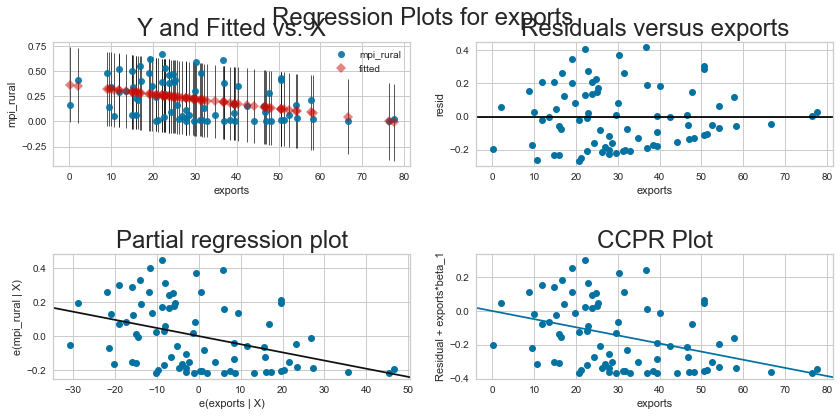

In [478]:
str1='exports'
model=ols('mpi_rural~exports',data=merged_df).fit()
reg_model(str1, model)

                            OLS Regression Results                            
Dep. Variable:              mpi_rural   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2349
Date:                Wed, 08 Dec 2021   Prob (F-statistic):              0.629
Time:                        23:46:49   Log-Likelihood:                 17.065
No. Observations:                  79   AIC:                            -30.13
Df Residuals:                      77   BIC:                            -25.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1891      0.064      2.959      0.0

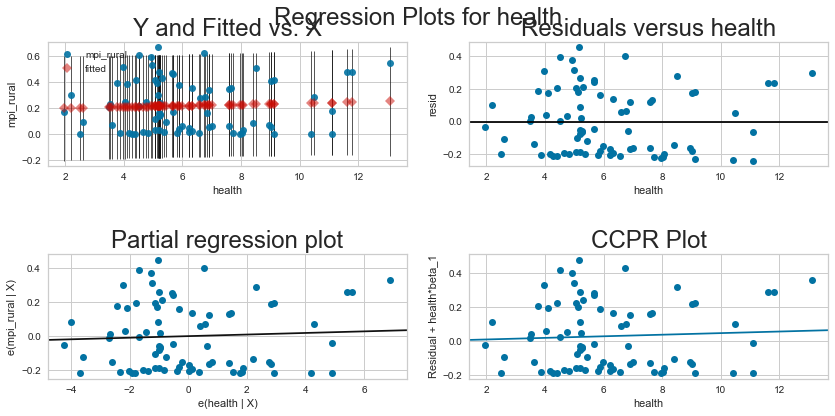

In [479]:
str1='health'
model=ols('mpi_rural~health',data=merged_df).fit()
reg_model(str1, model)

                            OLS Regression Results                            
Dep. Variable:              mpi_rural   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5423
Date:                Wed, 08 Dec 2021   Prob (F-statistic):              0.464
Time:                        23:47:13   Log-Likelihood:                 17.222
No. Observations:                  79   AIC:                            -30.44
Df Residuals:                      77   BIC:                            -25.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2568      0.057      4.508      0.0

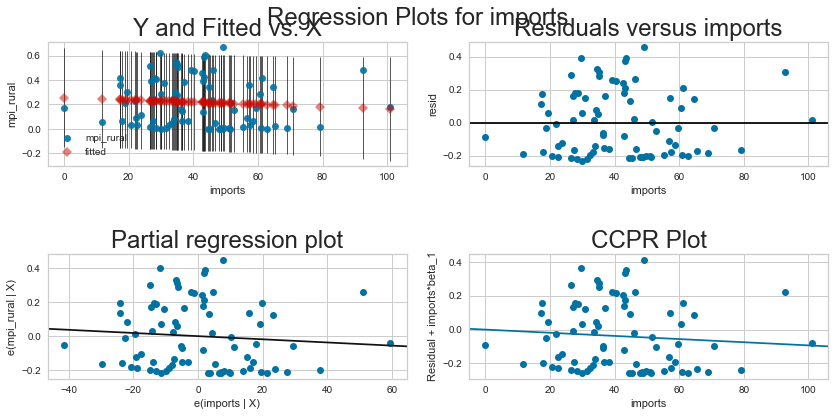

In [480]:
str1='imports'
model=ols('mpi_rural~imports',data=merged_df).fit()
reg_model(str1, model)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     35.62
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           6.90e-08
Time:                        09:14:37   Log-Likelihood:                 97.089
No. Observations:                  79   AIC:                            -190.2
Df Residuals:                      77   BIC:                            -185.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1275      0.012     11.024      0.0

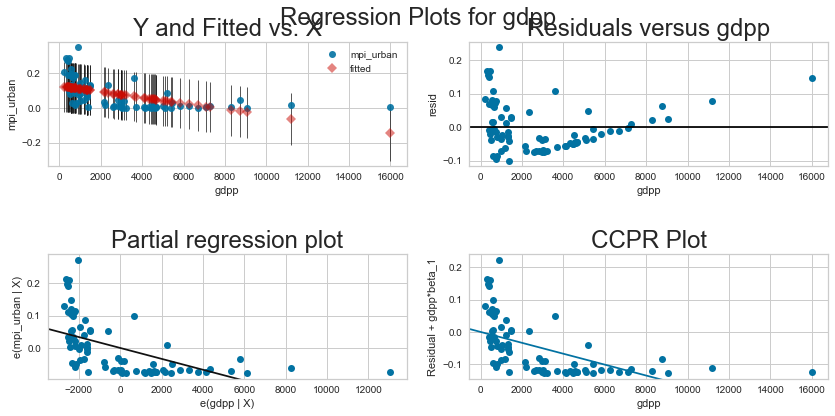

In [483]:
str1='gdpp'
model=ols('mpi_urban~gdpp', data=merged_df).fit()
reg_model(str1,model)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     69.50
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           2.28e-12
Time:                        09:19:05   Log-Likelihood:                 107.48
No. Observations:                  79   AIC:                            -211.0
Df Residuals:                      77   BIC:                            -206.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1534      0.011     13.366      0.0

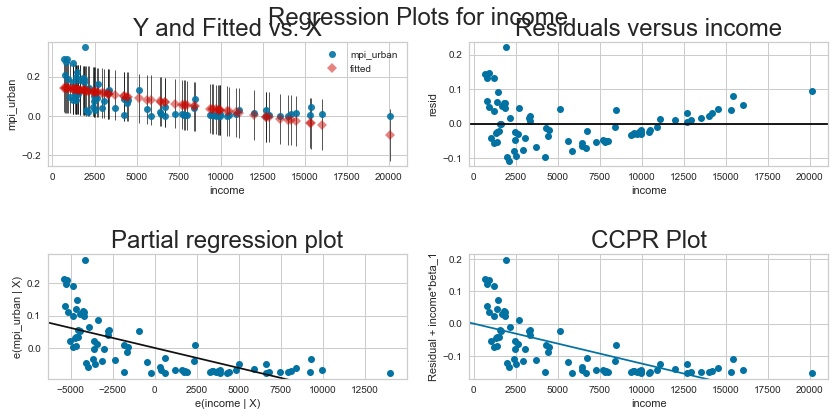

In [484]:
str1='income'
model=ols('mpi_urban~income', data=merged_df).fit()
reg_model(str1,model)

                            OLS Regression Results                            
Dep. Variable:              mpi_urban   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     54.76
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           1.44e-10
Time:                        09:19:54   Log-Likelihood:                 103.29
No. Observations:                  79   AIC:                            -202.6
Df Residuals:                      77   BIC:                            -197.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4971      0.057      8.703      0.0

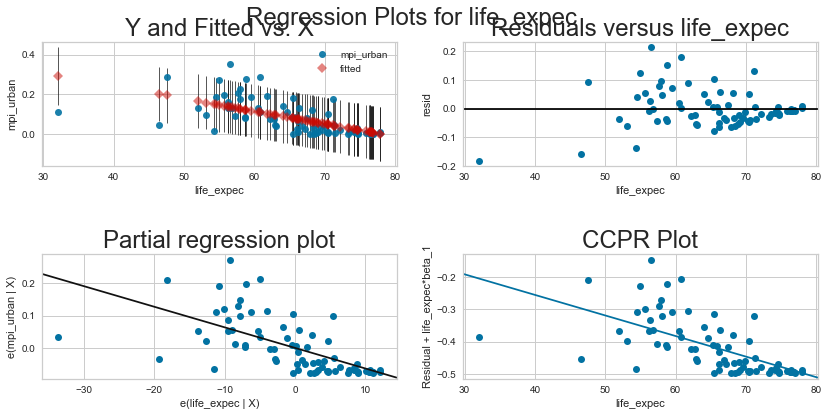

In [485]:
str1='life_expec'
model=ols('mpi_urban~life_expec', data=merged_df).fit()
reg_model(str1,model)

###### Insights
1. Multi-colinearity is strong in case of 'income' and 'gdpp'
2. **Heteroscedasticity:** Based on the interpretation of the 'Residuals vs Feature" plot these are the features that might show heteroscedasticity: child_mort, income, total,fert, life_expec ("cone" shape of fitted values as opposed to randomly scattered).

### lets fit the data into the linear model (mulivariate regression)

In [504]:
x=merged_df.iloc[:,1:-2]
y=merged_df.iloc[:,-2]

In [508]:
reg.fit(x,y)

LinearRegression()

In [509]:
# accuracy assessment
# R-squared: indicates the proportion of variance in y (mpi_urban), explained by x (other features selected)
reg.score(x,y)

0.834881661446278

In [517]:
# accuracy assessment
# adjusted R-squared: The adjusted R-squared is a modified version of R-squared that adjusts for the number 
#  of predictors in a regression model.

1 - (1-reg.score(x,y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.8133444868523142

##### summery
1. From prior clustering we got to know that countries in the cluster have very good condition in all the considers aspects(in terms of feature considered)
2. Create the new dataset by considering clusters 0 and 1 countries and also using most influential features.

1. child_mort: child mortality is a strong indicator of need for development aid
2. gdpp: to include a monetary measure more related to traditional measures of poverty/development
3. MPI urban: captures not only the proportion of the population in poverty but also the intensity of these deprivations

In [519]:
## getting data set containing only two clusters 0 and 1

cluster_0_1=cluster_0.append(cluster_1, ignore_index=True)
cluster_0_1

country  child_mort  exports  health  imports  income  \
0                Albania        16.6     28.0    6.55     48.6    9930   
1                Algeria        27.3     38.4    4.17     31.4   12900   
2    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
3              Argentina        14.5     18.9    8.10     16.0   18700   
4                Armenia        18.1     20.8    4.40     45.3    6700   
..                   ...         ...      ...     ...      ...     ...   
126          Timor-Leste        62.6      2.2    9.12     27.8    1850   
127                 Togo        90.3     40.2    7.65     57.3    1210   
128               Uganda        81.0     17.1    9.01     28.6    1540   
129                Yemen        56.3     30.0    5.18     34.4    4480   
130               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0         4.49        76.3       1.65   4090        0  
1        16.10        76.5       2.89   4460        0  
2         1.44        76.8       2.13  12200        0  
3        20.90        75.8       2.37  10300        0  
4         7.77        73.3       1.69   3220        0  
..         ...         ...        ...    ...      ...  
126      26.50        71.1       6.23   3600        1  
127       1.18        58.7       4.87    488        1  
128      10.60        56.8       6.15    595        1  
129      23.60        67.5       4.67   1310        1  
130      14.00        52.0       5.40   1460        1  

[131 rows x 11 columns]

In [558]:
final_merged=pd.merge(cluster_0_1, mpi_data_new,
                     on='country',
                     how='inner')

final_merged

country  child_mort  exports  health  imports  income  inflation  \
0       Albania        16.6     28.0    6.55     48.6    9930       4.49   
1       Algeria        27.3     38.4    4.17     31.4   12900      16.10   
2       Armenia        18.1     20.8    4.40     45.3    6700       7.77   
3    Azerbaijan        39.2     54.3    5.88     20.7   16000      13.80   
4    Bangladesh        49.4     16.0    3.52     21.8    2440       7.14   
..          ...         ...      ...     ...      ...     ...        ...   
74  Timor-Leste        62.6      2.2    9.12     27.8    1850      26.50   
75         Togo        90.3     40.2    7.65     57.3    1210       1.18   
76       Uganda        81.0     17.1    9.01     28.6    1540      10.60   
77        Yemen        56.3     30.0    5.18     34.4    4480      23.60   
78       Zambia        83.1     37.0    5.89     30.9    3280      14.00   

    life_expec  total_fer  gdpp  cluster  mpi_urban  mpi_rural  
0         76.3       1.65  4090        0      0.003      0.007  
1         76.5       2.89  4460        0      0.003      0.011  
2         73.3       1.69  3220        0      0.001      0.001  
3         69.1       1.92  5840        0      0.009      0.035  
4         70.4       2.33   758        0      0.100      0.231  
..         ...        ...   ...      ...        ...        ...  
74        71.1       6.23  3600        1      0.176      0.414  
75        58.7       4.87   488        1      0.081      0.356  
76        56.8       6.15   595        1      0.133      0.408  
77        67.5       4.67  1310        1      0.080      0.304  
78        52.0       5.40  1460        1      0.130      0.380  

[79 rows x 13 columns]

In [559]:
### droping only country, and other not so reliable columns 
sub_df=final_merged.drop(['country','cluster','exports','health','imports',
                          'income','inflation','life_expec','total_fer','mpi_rural'], axis=1)

In [560]:
### scaling 
scaler=StandardScaler().fit(sub_df)
cols=sub_df.columns
sub_df[cols]=scaler.transform(sub_df)

In [561]:
km_final = KMeans (
    n_clusters = 3, # number of clusters/centroids to create
    init = 'random', # ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids
    n_init = 10, # this is the default value. This is the number of times the k-means algorithm will be run with different centroid seeds
    max_iter = 300, # this is the default value. This is the maximum number of iterations of the k-means algorithm for a single run.
    tol = 1e-4, # this is the default value. This is the relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
    random_state = 0 # this is the default value. Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
)

In [562]:
y_pred=km_final.fit_predict(sub_df)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0,
       2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1])

In [563]:
sub_df['cluster']=y_pred

sub_df.head(5)

child_mort      gdpp  mpi_urban  cluster
0   -1.040704  0.405666  -0.876534        0
1   -0.788697  0.535323  -0.876534        0
2   -1.005376  0.100798  -0.899892        0
3   -0.508427  1.018907  -0.806458        0
4   -0.268196 -0.761944   0.256352        1

Text(0, 0.5, 'sse(sum of distance between the clusters formed)')

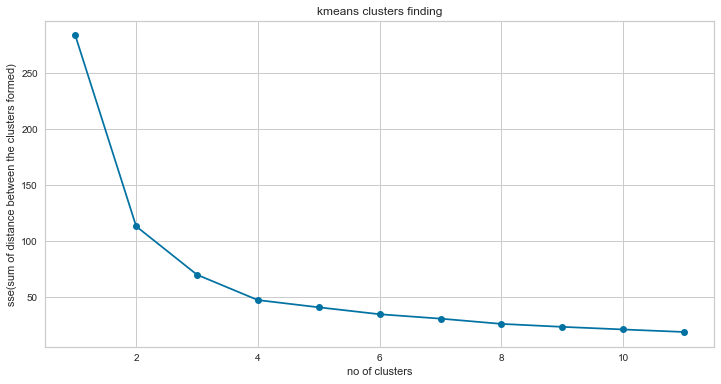

In [564]:
sse=[]
for i in range(1,12):
    km_2=KMeans(n_clusters=i,n_init=10,
               init='random',max_iter=300,
               tol=1e-04, random_state=0)
    km_2.fit(sub_df)
    sse.append(km_2.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,12),sse,marker='o')
plt.title('kmeans clusters finding')
plt.xlabel('no of clusters')
plt.ylabel('sse(sum of distance between the clusters formed)')

In [565]:
### still it is 3 cluster (from above plot)
final_merged['cluster']=y_pred.tolist()
final_merged.head(10)

country  child_mort  exports  health  imports  income  \
0                 Albania        16.6     28.0    6.55     48.6    9930   
1                 Algeria        27.3     38.4    4.17     31.4   12900   
2                 Armenia        18.1     20.8    4.40     45.3    6700   
3              Azerbaijan        39.2     54.3    5.88     20.7   16000   
4              Bangladesh        49.4     16.0    3.52     21.8    2440   
5                Barbados        14.2     39.5    7.97     48.7   15300   
6                  Belize        18.8     58.2    5.20     57.5    7880   
7                  Bhutan        42.7     42.5    5.20     70.7    6420   
8  Bosnia and Herzegovina         6.9     29.7   11.10     51.3    9720   
9                  Brazil        19.8     10.7    9.01     11.8   14500   

   inflation  life_expec  total_fer   gdpp  cluster  mpi_urban  mpi_rural  
0      4.490        76.3       1.65   4090        0      0.003      0.007  
1     16.100        76.5       2.89   4460        0      0.003      0.011  
2      7.770        73.3       1.69   3220        0      0.001      0.001  
3     13.800        69.1       1.92   5840        0      0.009      0.035  
4      7.140        70.4       2.33    758        1      0.100      0.231  
5      0.321        76.7       1.78  16000        0      0.004      0.002  
6      1.140        71.4       2.71   4340        0      0.006      0.028  
7      5.990        72.1       2.38   2180        0      0.019      0.159  
8      1.400        76.8       1.31   4610        0      0.002      0.002  
9      8.410        74.2       1.80  11200        0      0.016      0.054

In [579]:
sub_cluster_df = final_merged.drop(['exports','health','imports','income',
                                           'inflation','life_expec','total_fer','mpi_rural'], axis =1)
sub_cluster_df.head()

country  child_mort  gdpp  cluster  mpi_urban
0     Albania        16.6  4090        0      0.003
1     Algeria        27.3  4460        0      0.003
2     Armenia        18.1  3220        0      0.001
3  Azerbaijan        39.2  5840        0      0.009
4  Bangladesh        49.4   758        1      0.100

c:\users\swaro\appdata\local\programs\python\python37\lib\site-packages\mapclassify\classifiers.py:1718: UserWarning:


c:\users\swaro\appdata\local\programs\python\python37\lib\site-packages\mapclassify\classifiers.py:1719: UserWarning:




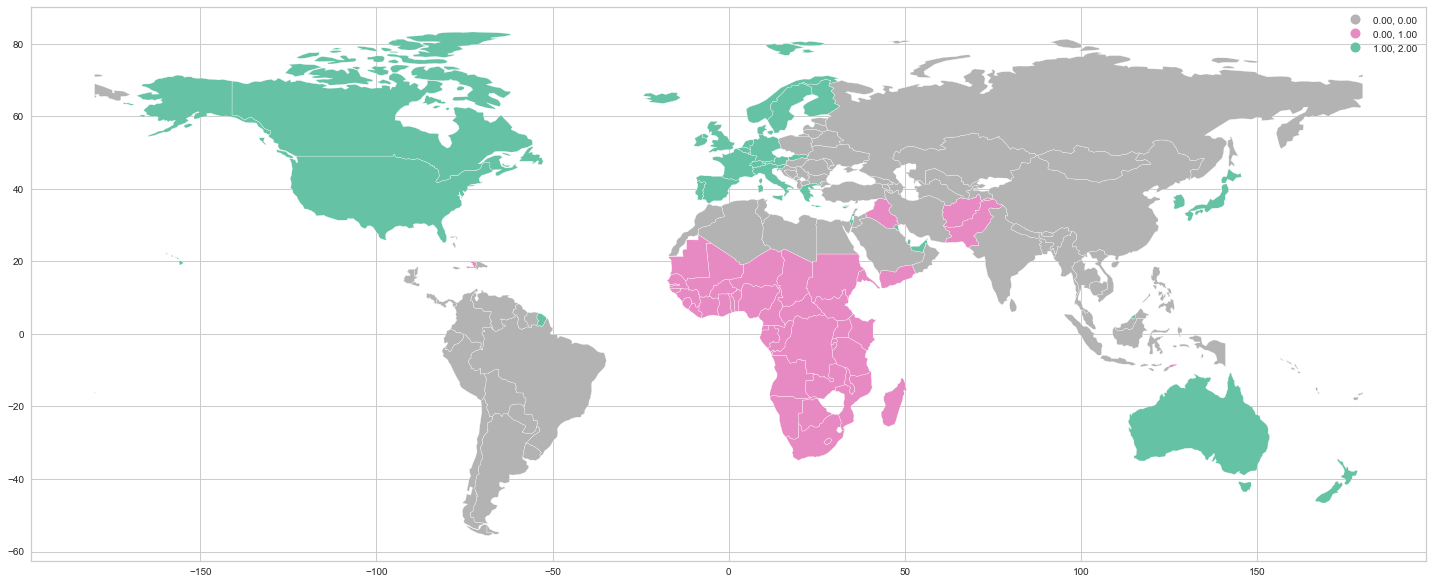

In [580]:
world_merge=pd.merge(sub_cluster_df, world_copy,
                    on='country',
                    how='inner')
world_merge.head()### sample print

import mapclassify
world_data.plot(column='cluster', scheme="NaturalBreaks",
           figsize=(25, 20),
           legend=True,cmap='Set2_r');

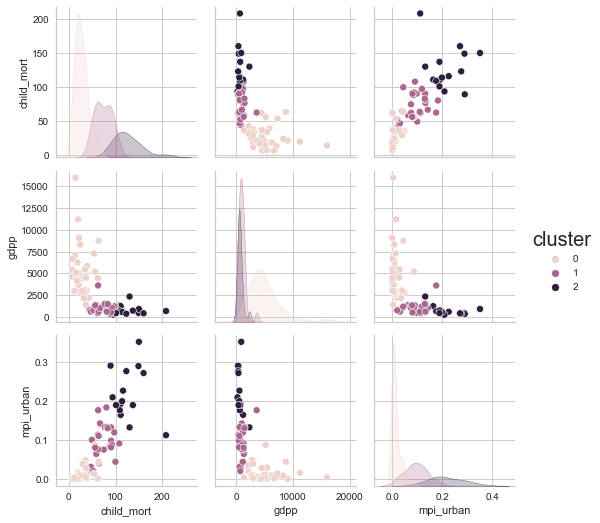

In [583]:
## pairplot to check the correlation

sns.color_palette('Set1')
sns.pairplot(sub_cluster_df, hue='cluster')


In [585]:
sub_cluster_0=sub_cluster_df.loc[sub_cluster_df['cluster']==0]
sub_cluster_0.head()

country  child_mort   gdpp  cluster  mpi_urban
0     Albania        16.6   4090        0      0.003
1     Algeria        27.3   4460        0      0.003
2     Armenia        18.1   3220        0      0.001
3  Azerbaijan        39.2   5840        0      0.009
5    Barbados        14.2  16000        0      0.004

Text(0.5, 0, 'mpi')

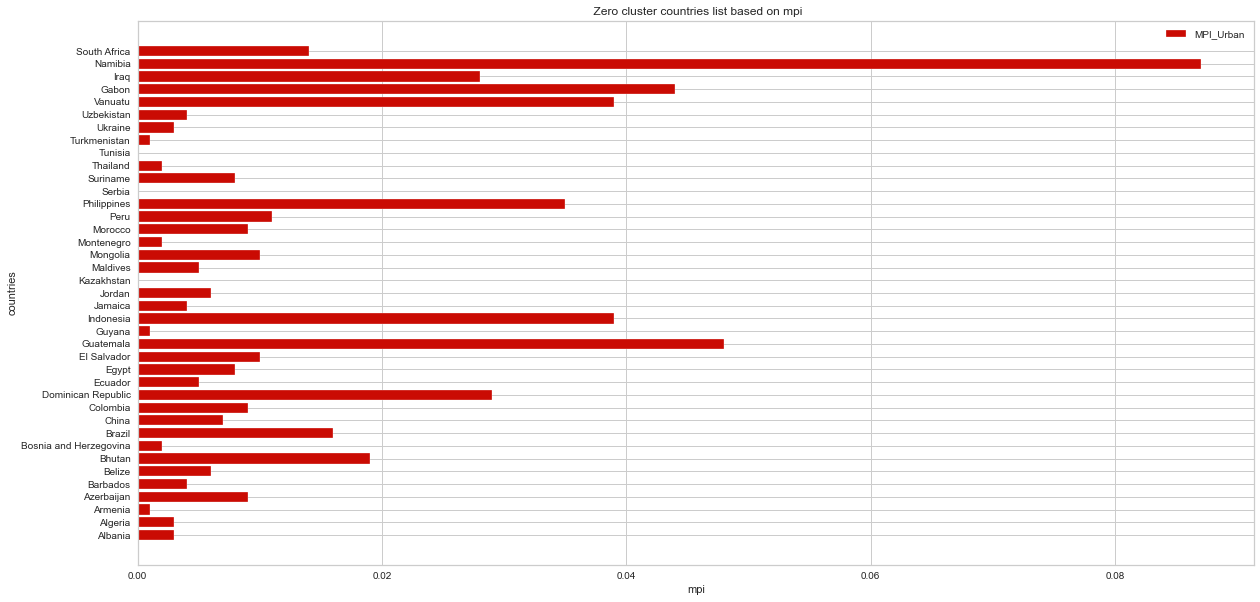

In [590]:
### finally plot the indicators 

####  MPI of zero cluster

plt.barh(sub_cluster_0['country'],sub_cluster_0['mpi_urban'], label='MPI_Urban', color='r')
mp.rc('font',size=15)
plt.legend()
plt.title(' Zero cluster countries list based on mpi')
plt.ylabel('countries')
plt.xlabel('mpi')

In [597]:
### gdpp of zero cluster countries

px.bar(sub_cluster_0,y='country',x='gdpp', title='Zero cluster countries list based on child_mortality')

Text(0.5, 0, 'child_mortality')

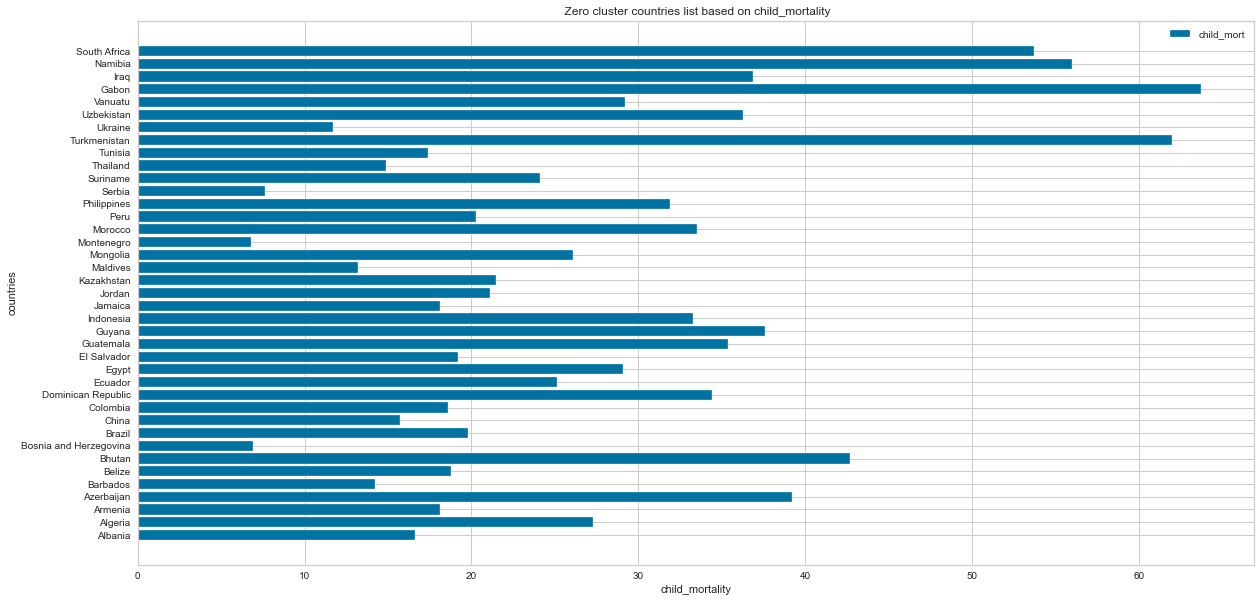

In [599]:

plt.barh(sub_cluster_0['country'],sub_cluster_0['child_mort'], label='child_mort', color='b')
mp.rc('font',size=15)
plt.legend()
plt.title(' Zero cluster countries list based on child_mortality')
plt.ylabel('countries')
plt.xlabel('child_mortality')

In [598]:
## separating clusters with country one
sub_cluster_1=sub_cluster_df.loc[sub_cluster_df['cluster']==1]
sub_cluster_1.head()

country  child_mort  gdpp  cluster  mpi_urban
4   Bangladesh        49.4   758        1      0.100
10    Cambodia        44.4   786        1      0.028
19       India        58.8  1350        1      0.064
28     Myanmar        64.4   988        1      0.040
29       Nepal        47.0   592        1      0.031

Text(0.5, 0, 'mpi')

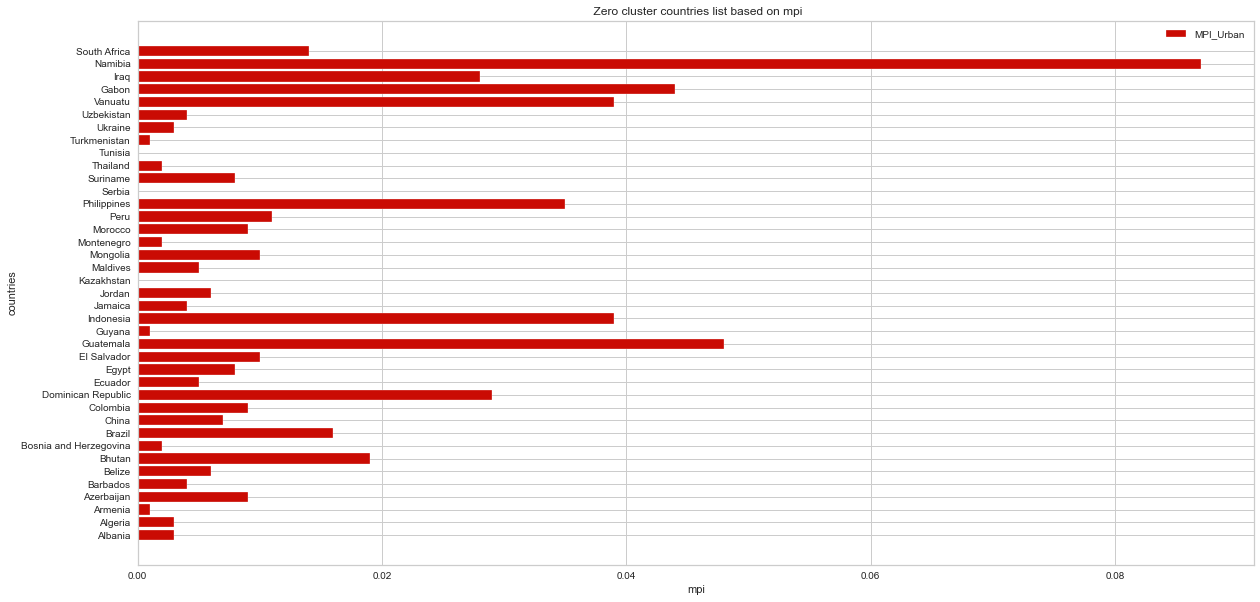

In [601]:
### plot on cluster 1 countries
plt.barh(sub_cluster_0['country'],sub_cluster_0['mpi_urban'], label='MPI_Urban', color='r')
mp.rc('font',size=15)
plt.legend()
plt.title(' Zero cluster countries list based on mpi')
plt.ylabel('countries')
plt.xlabel('mpi')

Text(0.5, 0, 'child_mortality')

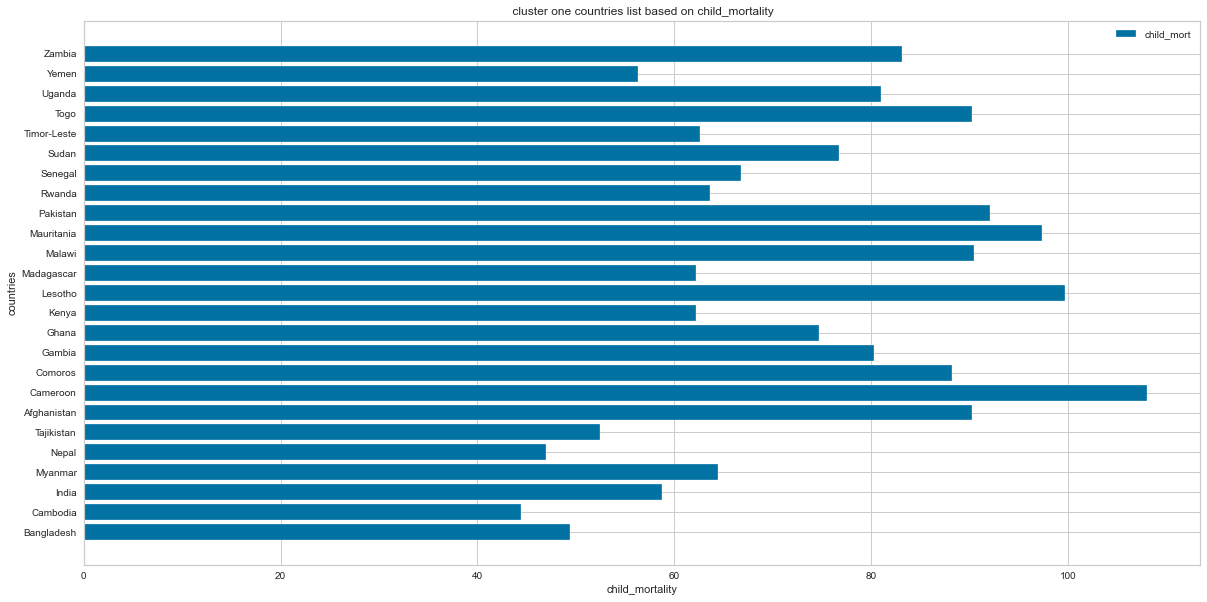

In [602]:
plt.barh(sub_cluster_1['country'],sub_cluster_1['child_mort'], label='child_mort', color='b')
mp.rc('font',size=15)
plt.legend()
plt.title(' cluster one countries list based on child_mortality')
plt.ylabel('countries')
plt.xlabel('child_mortality')

In [603]:
### lets have a look into the mpi of countries fall under cluster two

## separating clusters with country one
sub_cluster_1=sub_cluster_df.loc[sub_cluster_df['cluster']==2]
sub_cluster_1.head()

country  child_mort  gdpp  cluster  mpi_urban
42                     Benin       111.0   758        2      0.192
43              Burkina Faso       116.0   575        2      0.226
44                   Burundi        93.6   231        2      0.209
46  Central African Republic       149.0   446        2      0.289
47                      Chad       150.0   897        2      0.351

###### Conclusion

1. Clustering is not sufficient enough to make decision, at the end we have to use supervised learning to get more insight on dataset and to derive the conclusion using linear model will be more effective

2. Pertaining to above graphs, plotted along the strong indicators(gdpp,child_mort,mpi) as the decision makers. It is very much clear to avial the conclusion on each countries 

# END